In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
import pandas as pd
from keras.datasets import mnist

import matplotlib
import matplotlib.pyplot as plt

import random     
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


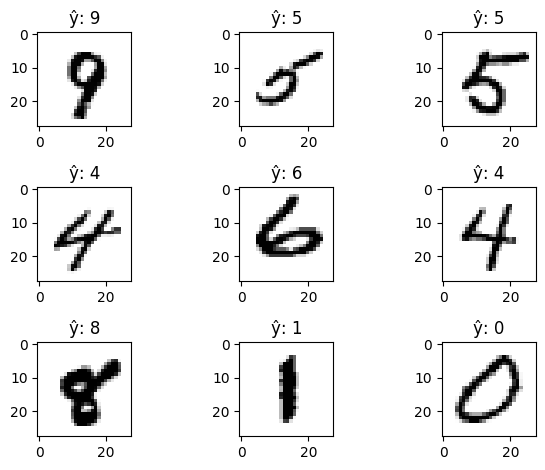

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='binary', interpolation='none')
    plt.title("ŷ: {}".format(y_train[num]))
    
plt.tight_layout()

In [4]:
X_train = X_train.astype('float32')
X_train /= 255.0
print("X_train shape", X_train.shape)

X_test = X_test.astype('float32')
X_test /= 255
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


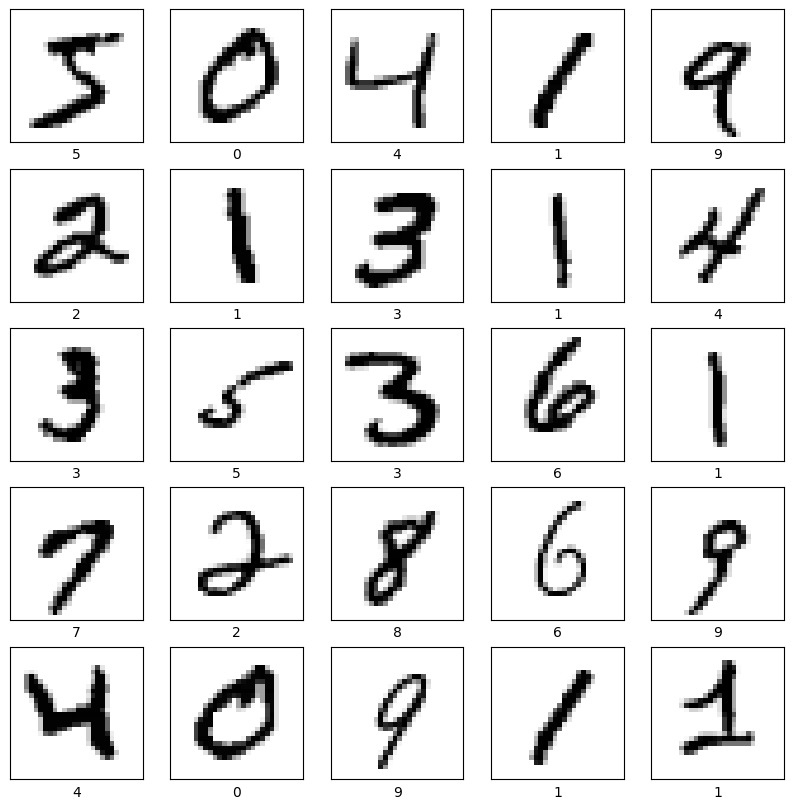

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
model = Sequential(
    [               
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu', name='layer1'),
        Dense(512, activation='relu', name='layer2'),
        Dense(10, activation='linear', name='layer3')
    ]
)                            

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layer3 (Dense)              (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1815 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0810 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0562 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0439 - accuracy: 0.9857
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0327 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0208 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 28s 15m

In [8]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.1039 - accuracy: 0.9778 - 2s/epoch - 6ms/step

Test accuracy: 0.9778000116348267


In [9]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [10]:
predictions = probability_model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [11]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Prediction:{} {:2.0f}% (ŷ:{})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [12]:
np.argmax(predictions[0])

7

In [13]:
y_test[0]

7

[4.2203880e-07 9.3268754e-06 1.9049911e-06 3.2717078e-09 5.9870028e-01
 3.7642008e-11 2.0777793e-10 8.2768722e-11 1.3186240e-08 4.0128803e-01] , 9


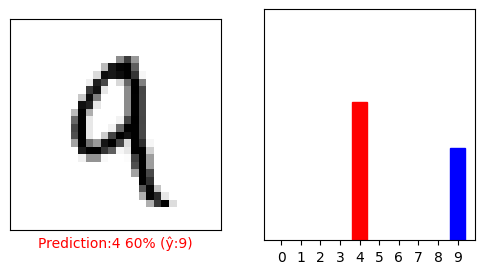

[6.6365132e-08 9.2377561e-10 9.8553282e-01 1.2950386e-11 6.3937753e-03
 3.4070112e-07 8.0729872e-03 2.4363267e-10 1.0399792e-08 3.8287669e-17] , 4


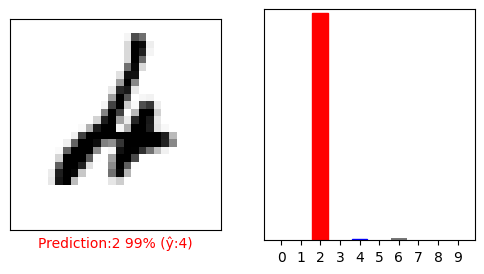

[3.0647398e-09 9.7558764e-04 1.0361035e-09 2.4374272e-10 7.6929504e-01
 5.6395697e-11 2.0786734e-12 1.7277100e-07 8.3346657e-07 2.2972831e-01] , 9


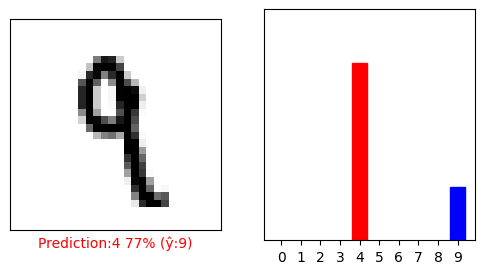

[7.2621646e-16 9.8622152e-11 1.9160777e-09 9.9947089e-01 7.1969625e-14
 5.2911649e-04 5.6397669e-14 4.4026661e-13 4.4453355e-10 4.5365928e-10] , 5


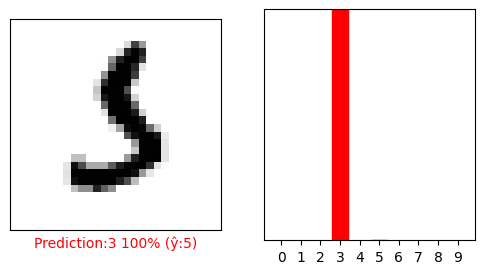

[2.7304743e-06 8.4396149e-04 6.5641339e-05 3.0623859e-01 3.1884992e-06
 7.1735997e-07 7.4154265e-08 6.9280648e-01 3.6152021e-05 2.5063789e-06] , 3


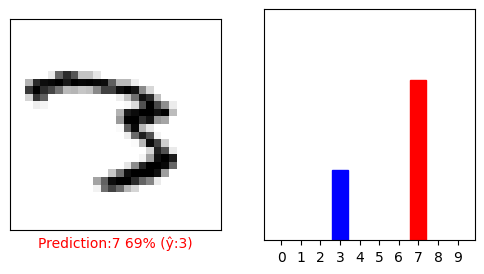

[2.1541571e-11 1.3809583e-07 3.5565655e-08 9.5905524e-01 2.8604350e-09
 4.0716138e-02 6.0244990e-11 6.3033512e-09 3.2089509e-05 1.9636466e-04] , 5


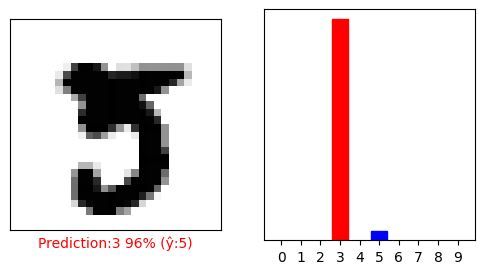

[6.6107348e-02 1.6504720e-05 8.1406379e-01 1.0130206e-05 1.8653687e-05
 3.6215817e-09 1.3189857e-05 7.0221926e-09 1.1976974e-01 6.9388267e-07] , 8


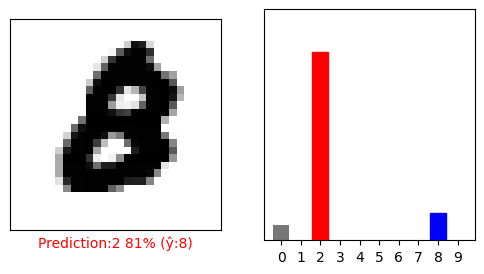

[8.8506633e-13 7.9619149e-08 4.4440887e-10 6.0759759e-01 2.6852415e-08
 1.2861224e-11 3.1280126e-17 3.9100683e-01 9.8842996e-08 1.3954480e-03] , 7


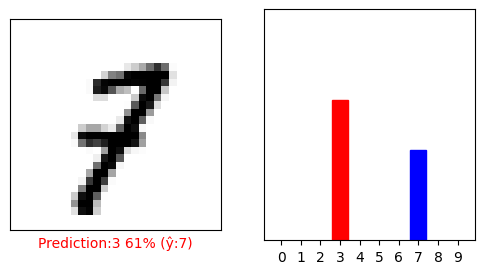

[5.2536672e-07 1.1103120e-02 4.7552893e-03 2.9147277e-04 9.7571409e-01
 2.1848762e-11 5.2384902e-10 8.1124157e-03 2.0924175e-10 2.3073750e-05] , 7


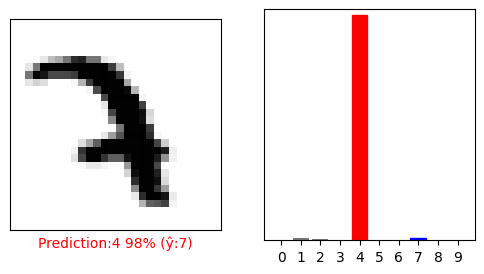

[1.2102200e-07 7.2659028e-04 1.5846665e-06 2.2530704e-08 9.9856693e-01
 2.3849514e-08 1.9723532e-07 8.2673796e-05 5.9558812e-04 2.6275395e-05] , 8


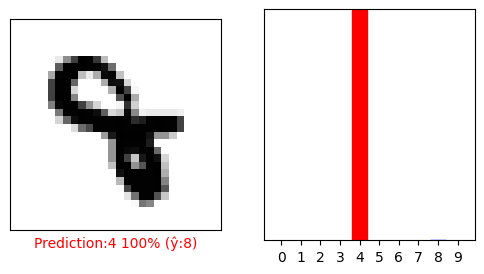

[1.1254141e-12 1.4425818e-12 4.1535661e-13 8.8136800e-14 5.3182958e-11
 3.0926872e-06 4.2924849e-08 2.2969469e-17 9.9999690e-01 1.2435879e-12] , 5


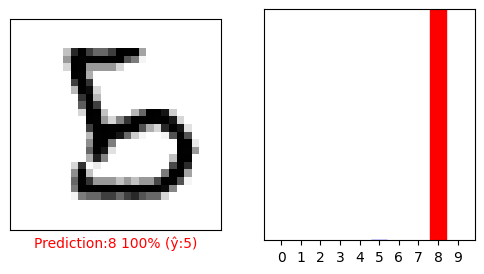

[1.5015252e-06 8.8030220e-06 7.1051012e-08 2.5400053e-05 1.1704042e-04
 2.3499462e-08 1.0745303e-08 3.1253967e-06 5.1463734e-02 9.4838023e-01] , 8


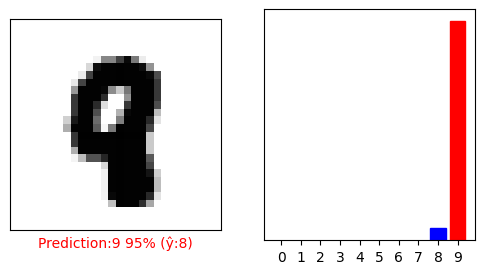

[8.19819164e-08 1.98458224e-07 3.19927636e-07 2.52741916e-08
 5.18399775e-01 5.23470081e-02 6.61513525e-07 1.05004646e-01
 1.74045202e-03 3.22506875e-01] , 5


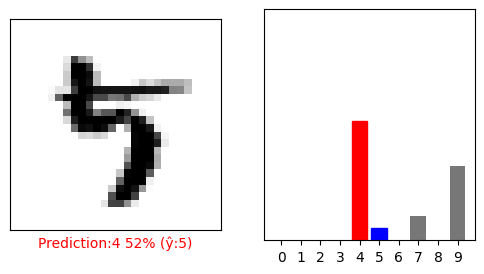

[3.7354278e-10 4.2000334e-03 9.9569881e-01 6.9881457e-07 9.9929173e-07
 5.0480726e-09 7.8329525e-05 8.9475893e-10 2.1075171e-05 5.9324743e-15] , 1


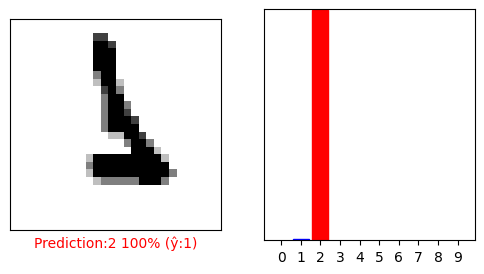

[1.6525315e-14 1.6687864e-07 4.2351753e-10 9.5266080e-01 2.8930236e-10
 4.7043312e-02 4.7568746e-12 4.7763783e-11 1.7081649e-07 2.9552286e-04] , 5


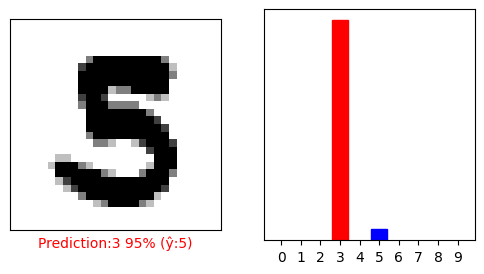

[1.6381935e-03 5.4118821e-10 1.0536424e-06 8.1263337e-05 2.7145402e-11
 9.9694675e-01 4.6416120e-05 4.0814657e-10 1.0087243e-03 2.7758646e-04] , 6


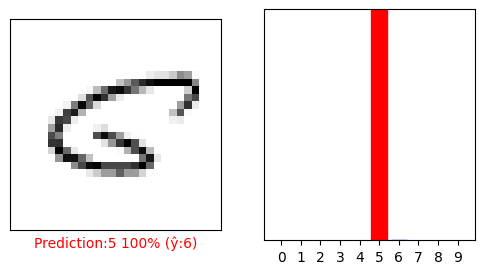

[1.0746460e-10 9.3101980e-13 2.7891415e-11 2.5098171e-07 2.7205356e-09
 1.2956771e-01 4.9526871e-10 1.2273037e-09 4.7763464e-09 8.7043208e-01] , 5


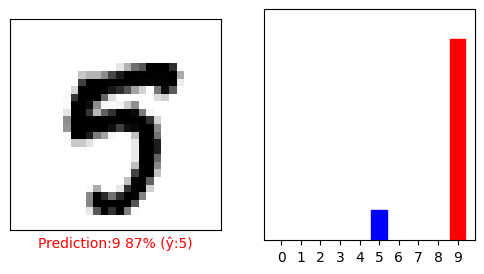

[1.0671383e-04 6.8282074e-01 1.7513815e-01 1.8402046e-04 4.6646863e-02
 7.2125563e-06 1.8251075e-04 1.9169787e-02 7.5643338e-02 1.0054010e-04] , 7


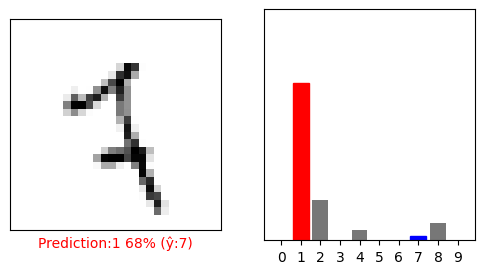

[7.6595112e-09 1.1895333e-21 1.3219176e-13 4.3424574e-22 4.6611640e-05
 6.2916510e-14 9.9995339e-01 1.3648207e-22 2.3417730e-17 5.0670015e-21] , 4


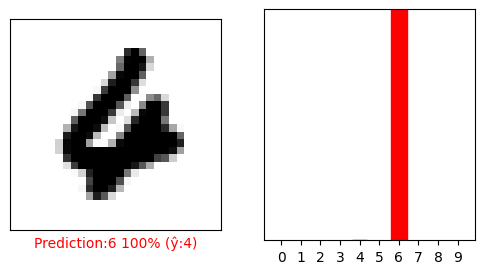

[6.7737914e-04 1.7609666e-05 2.6828664e-06 3.6072542e-03 5.5150650e-07
 1.9764893e-02 1.0291528e-04 2.2947118e-03 9.6971482e-01 3.8171518e-03] , 7


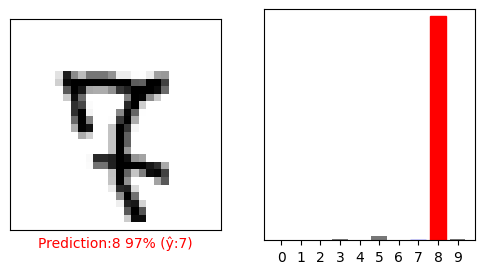

[3.8207896e-02 4.6551389e-07 1.5739777e-05 1.2589657e-09 1.3873075e-01
 1.3579881e-06 8.2304364e-01 2.3540550e-09 1.0748417e-07 9.4546920e-08] , 4


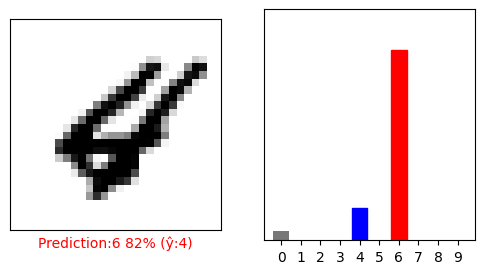

[1.7207652e-10 3.0161029e-08 1.0000000e+00 4.7017207e-10 1.0626187e-10
 3.0746069e-14 1.4188945e-08 1.1570401e-10 6.0055827e-09 2.3470759e-19] , 7


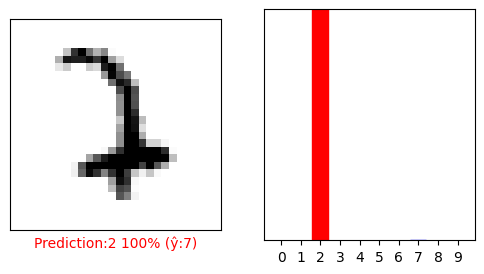

[1.6598994e-03 1.5873455e-02 3.8728835e-03 1.8296919e-04 9.2280465e-01
 4.7538799e-04 1.5440773e-03 3.8332737e-04 2.6066428e-02 2.7136954e-02] , 9


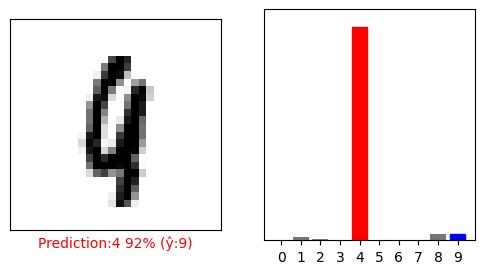

[2.7884179e-09 2.7617848e-06 4.2699853e-09 1.1577297e-10 1.9663191e-01
 5.8348641e-09 1.9004627e-09 1.6188894e-06 2.7218286e-10 8.0336368e-01] , 4


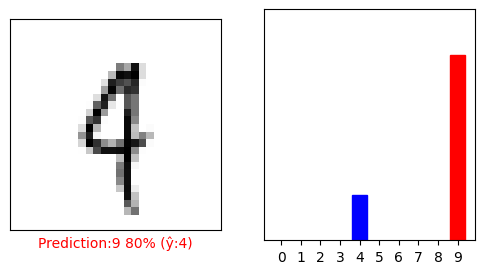

[8.4675691e-04 2.0239763e-03 3.3383269e-02 1.3955162e-01 1.2495181e-05
 8.1412178e-01 5.4341308e-06 4.5948289e-03 2.0048726e-06 5.4578166e-03] , 9


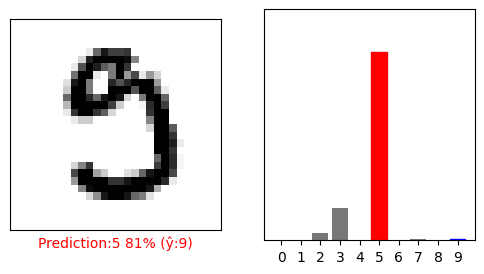

[1.05724146e-04 9.48982239e-01 3.50089394e-04 1.59254359e-05
 3.41501161e-02 1.25346123e-05 1.10417997e-04 1.48181925e-02
 4.45569487e-04 1.00924110e-03] , 7


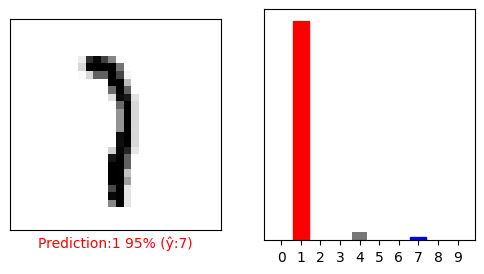

[1.2108586e-06 2.8092101e-10 4.3997597e-06 5.1161428e-03 6.5041854e-06
 4.1648766e-01 1.2183286e-06 1.4634226e-08 5.2118203e-06 5.7837760e-01] , 5


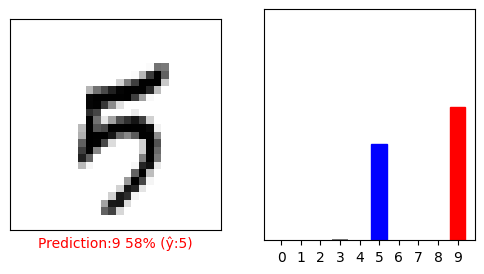

[3.3842434e-07 2.8915880e-12 1.0453856e-09 1.1967951e-09 1.2772877e-10
 1.9131025e-07 2.2495559e-14 9.9999857e-01 3.6455166e-14 7.9623936e-07] , 5


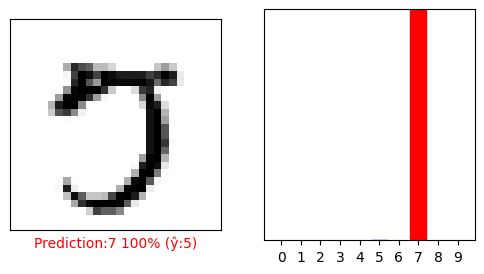

[9.9834955e-01 2.1243043e-08 3.4008750e-05 4.2291384e-04 1.6420371e-07
 5.8910766e-05 1.0123546e-03 5.1828843e-06 1.1677744e-04 2.4978212e-07] , 8


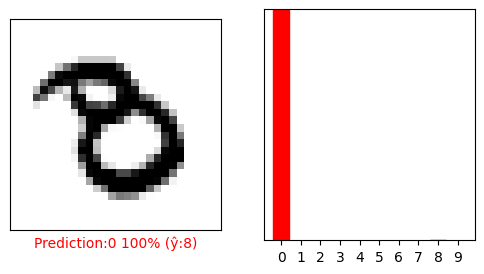

[5.0217994e-07 1.2968876e-02 3.0555682e-06 4.5646023e-04 4.4020329e-04
 1.6674182e-08 3.4865608e-10 4.8765278e-01 3.8851140e-04 4.9808961e-01] , 7


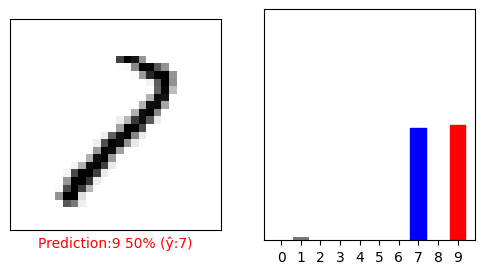

[1.6399496e-04 1.3484726e-06 6.5474200e-07 2.8175994e-06 1.6531958e-05
 6.5419835e-07 6.3336119e-09 1.2110461e-02 1.2718182e-02 9.7498530e-01] , 7


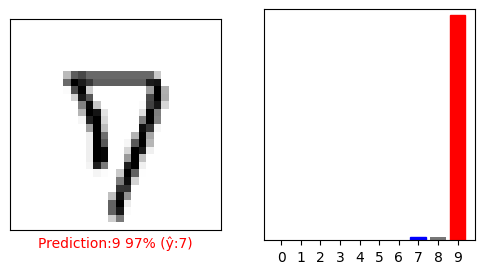

[2.54580135e-10 2.20972779e-05 1.58814635e-06 8.89534116e-01
 7.57115473e-08 1.09346494e-01 1.35406564e-09 9.31771297e-04
 1.57901566e-04 5.97491726e-06] , 5


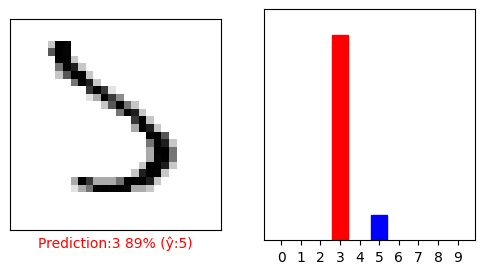

[8.4433609e-01 3.7145503e-06 1.1380408e-03 1.1273494e-06 4.7487376e-07
 8.5722263e-07 7.3084607e-08 7.7359654e-02 6.8191965e-03 7.0340738e-02] , 7


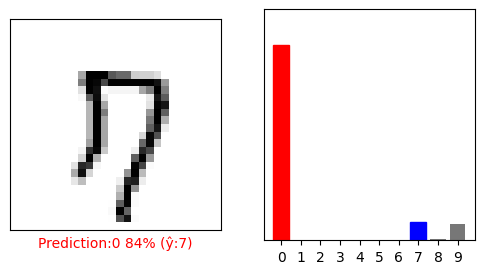

[1.13491762e-06 4.74991128e-02 3.11165313e-05 3.71296890e-04
 6.83646142e-01 1.08604816e-07 1.25645609e-08 2.67558187e-01
 1.96221532e-04 6.96699135e-04] , 7


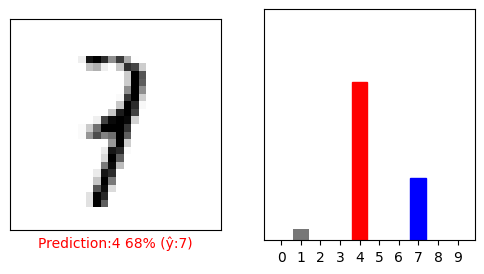

[2.8919397e-04 1.5817201e-01 3.6023913e-03 2.3904032e-04 3.7211910e-02
 1.4593065e-04 2.1585445e-05 8.2189664e-02 4.3157166e-01 2.8655663e-01] , 7


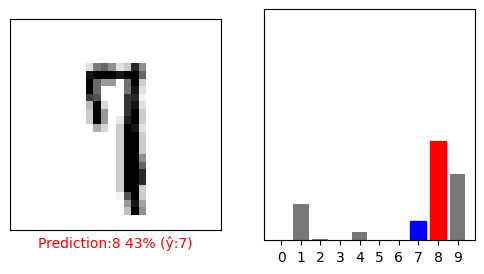

[6.0667196e-07 3.0107045e-04 2.5769630e-06 9.3758928e-05 3.8368930e-04
 9.3683788e-08 3.1831395e-09 9.9683630e-01 2.2054433e-03 1.7644549e-04] , 8


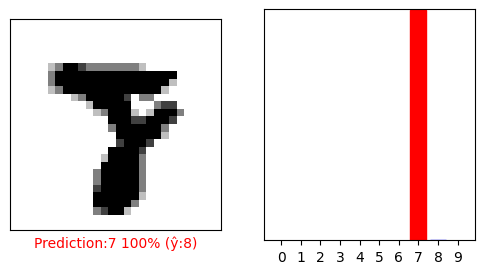

[2.2139233e-09 5.4462889e-11 3.2728580e-03 1.9138674e-14 7.5737265e-04
 2.0529026e-08 9.9596977e-01 5.3496730e-12 1.8312176e-09 3.2801602e-19] , 4


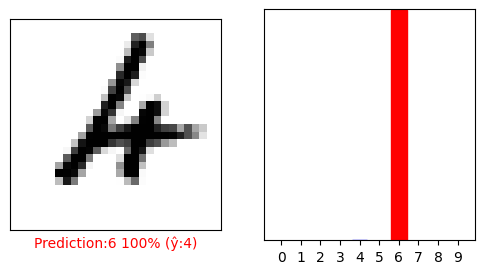

[6.1207188e-06 8.0350169e-04 3.5866392e-06 6.7180963e-06 4.6188901e-03
 5.1701761e-08 5.8155963e-10 1.5668794e-04 7.9802322e-01 1.9638124e-01] , 9


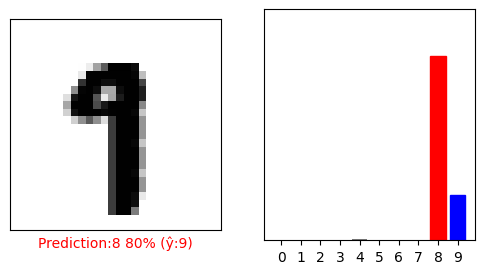

[9.2288093e-07 8.9721118e-17 1.3263240e-04 1.8681881e-08 5.2554489e-11
 1.6224143e-07 9.9986243e-01 7.8925277e-10 3.6469473e-06 2.0928375e-16] , 2


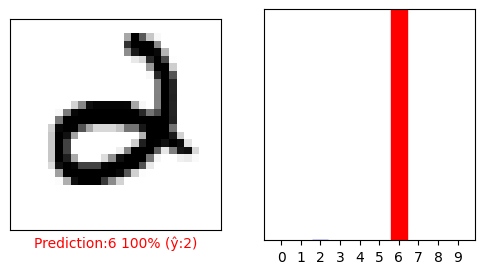

[1.4625431e-10 4.3059736e-06 1.9734753e-07 8.5904986e-01 2.4648921e-09
 9.5204200e-04 3.6935035e-11 1.1236327e-08 4.4238923e-06 1.3998917e-01] , 5


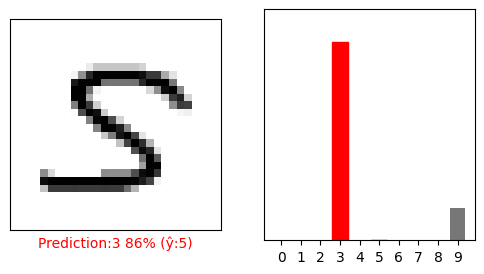

[5.5649891e-02 1.2653052e-04 2.9146013e-01 2.3416610e-06 2.2702586e-06
 9.0471959e-09 2.3672548e-05 6.5273494e-01 1.7098473e-07 9.0548568e-08] , 2


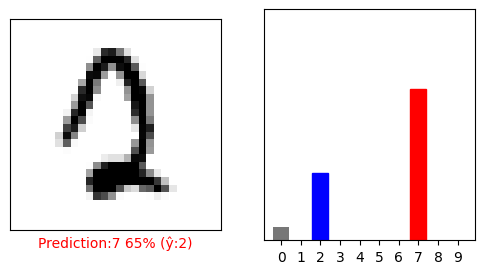

[1.4470500e-11 2.0723283e-08 2.0964924e-08 4.6176027e-04 2.7422812e-11
 1.4109902e-13 2.6021731e-16 9.9951088e-01 4.7803073e-09 2.7446653e-05] , 3


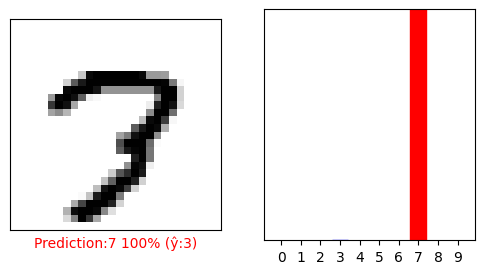

[7.3917747e-01 2.4271909e-05 1.1447888e-05 2.4156631e-07 2.9539459e-07
 5.6520696e-07 4.2764561e-05 1.8160918e-09 2.6073107e-01 1.1866855e-05] , 8


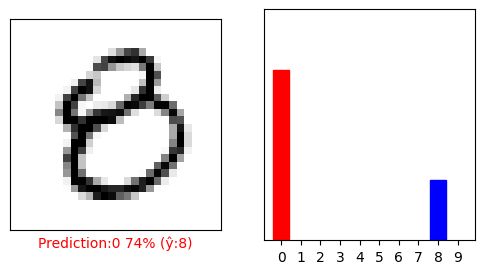

[1.0858803e-05 8.1758655e-04 5.9644644e-05 1.5897800e-05 2.7470338e-01
 1.0098599e-05 4.4836565e-07 5.3553604e-02 5.2754916e-03 6.6555297e-01] , 7


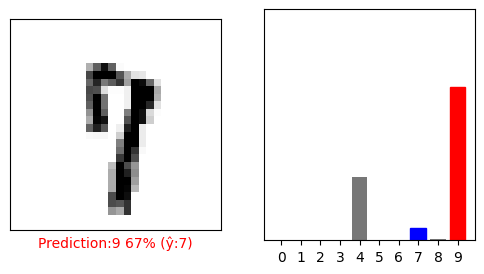

[6.5991406e-07 1.4749677e-18 4.5255035e-09 1.9949921e-14 7.0036296e-11
 3.3758807e-03 1.2025604e-06 9.9662220e-01 3.7074399e-10 2.8672626e-12] , 0


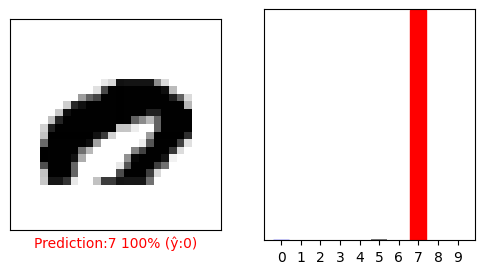

[9.1737937e-05 9.6914256e-03 7.3409534e-01 1.3115963e-03 1.4548463e-02
 9.6158814e-08 1.1078030e-04 2.4012235e-01 2.8152597e-05 6.7990027e-09] , 7


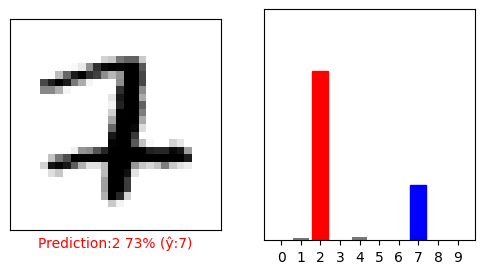

[1.6044223e-05 3.3910114e-02 9.9241305e-03 3.9914623e-01 3.7711677e-03
 1.4432262e-03 2.6691055e-07 5.1302946e-01 3.6972284e-05 3.8722374e-02] , 3


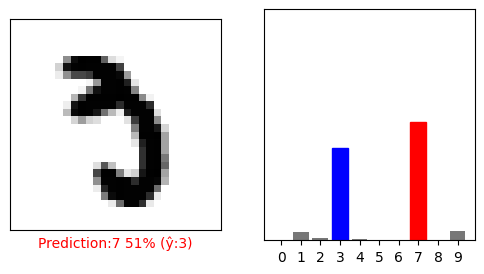

[4.27526937e-12 3.35301102e-08 3.41591311e-10 2.01956377e-12
 9.99945760e-01 2.01874784e-08 1.08628636e-11 1.04699346e-07
 6.32081480e-08 5.40175679e-05] , 9


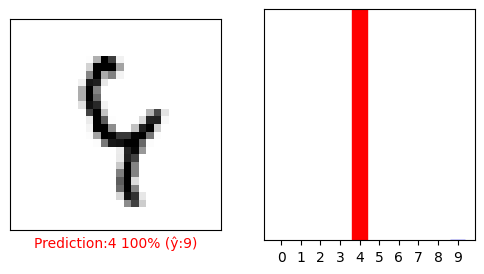

[9.4699639e-14 2.2462588e-16 1.0517607e-16 1.1684238e-09 8.6333746e-11
 7.1293903e-03 2.7015933e-13 6.6151689e-12 6.4044207e-11 9.9287063e-01] , 5


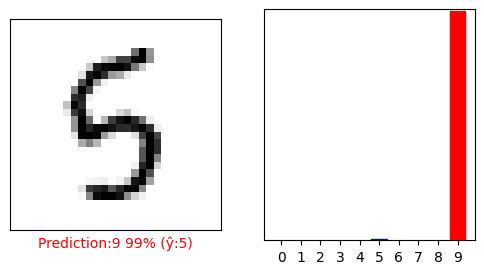

[7.2943922e-09 1.9068167e-12 4.3555112e-14 4.4942847e-14 7.2468973e-16
 4.6542689e-02 9.5345557e-01 7.1475896e-17 1.4908743e-06 1.6035762e-07] , 5


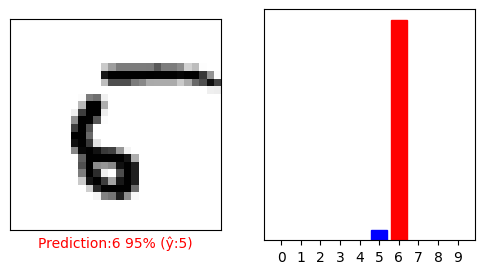

[7.0183647e-05 1.2048444e-06 8.2367311e-05 1.5878481e-01 8.2342517e-08
 7.9949729e-08 5.3772855e-08 3.6014989e-09 8.4105527e-01 5.9643353e-06] , 3


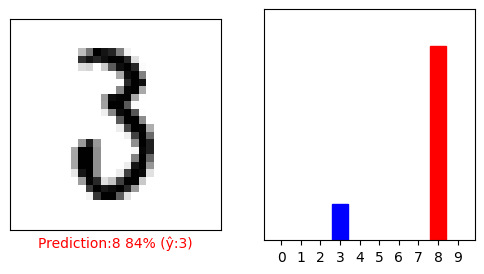

[1.2778495e-02 7.2395330e-04 6.6588777e-01 3.9208598e-02 1.6685936e-04
 1.1080389e-02 5.3023391e-06 4.9106050e-02 2.1533960e-01 5.7028793e-03] , 7


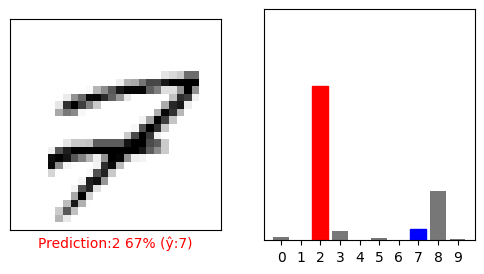

[8.1061406e-09 8.3309420e-10 4.0561057e-10 1.1831560e-05 4.2806366e-07
 1.7627731e-01 4.9942579e-09 9.6159532e-08 8.5968179e-07 8.2370943e-01] , 5


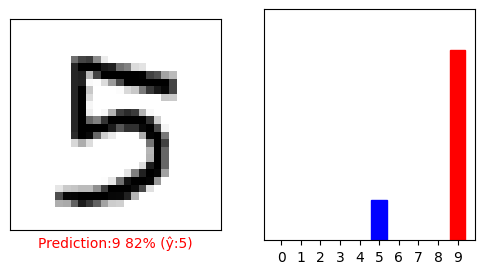

[5.9899077e-04 4.6619873e-02 5.0756776e-01 6.6925101e-02 9.3781861e-04
 2.6822447e-05 8.6131740e-06 3.3446825e-01 4.2751305e-02 9.5538693e-05] , 7


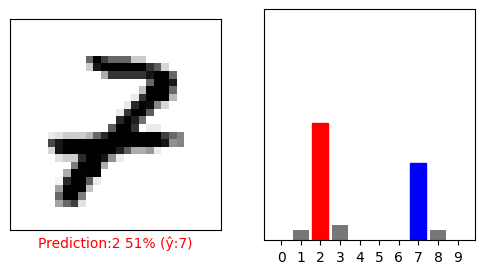

[5.76203196e-10 3.71419659e-08 1.21466243e-07 8.75814855e-01
 1.51326263e-09 1.24183916e-01 4.30811809e-07 1.05698632e-08
 3.49167607e-07 2.43124504e-07] , 5


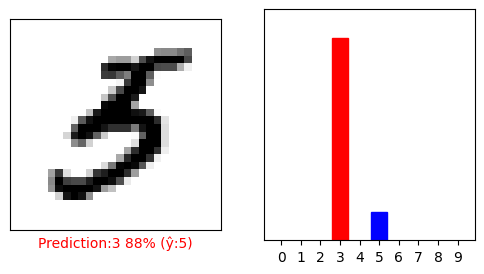

[2.49726213e-15 2.50349878e-16 5.64810405e-13 2.15914241e-13
 6.13791126e-05 2.25619501e-12 1.14283977e-18 1.13998546e-07
 3.51535151e-17 9.99938488e-01] , 4


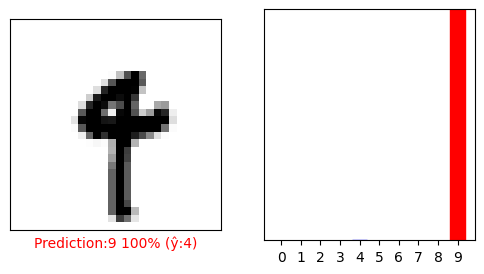

[2.9043373e-04 3.6784445e-03 8.2305727e-05 1.0322854e-07 3.1768952e-02
 8.8773104e-06 5.2057891e-07 9.0209402e-02 1.5483004e-06 8.7395936e-01] , 7


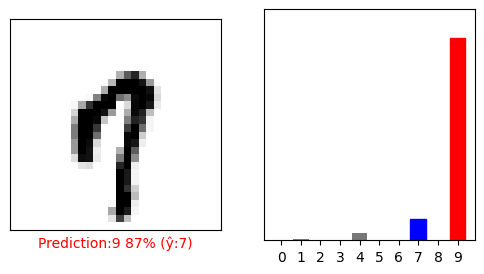

[3.19161750e-02 1.07505837e-14 7.49141191e-16 1.87884552e-11
 4.40143449e-10 1.21185021e-03 9.66871798e-01 1.10897574e-07
 9.24853527e-10 3.17640958e-09] , 5


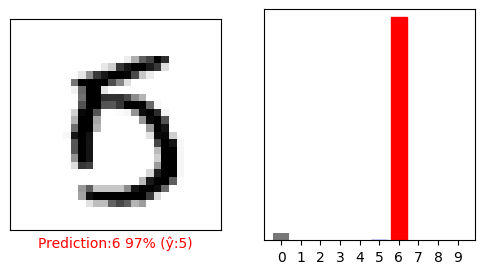

[3.5519727e-02 7.6512104e-01 3.8664977e-03 9.0641789e-03 1.5844002e-04
 3.1782853e-05 2.3610488e-04 2.8554241e-05 1.8540700e-01 5.6664494e-04] , 8


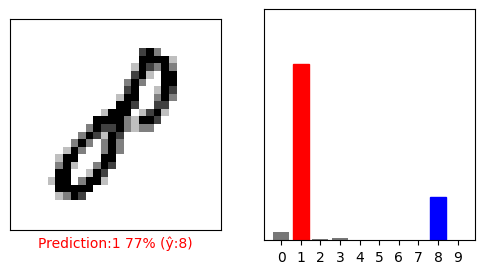

[9.96921420e-01 1.35787242e-14 3.07863182e-03 2.05863281e-13
 5.93458580e-18 9.94756782e-22 1.26266164e-15 1.08922945e-16
 8.57199262e-17 4.34946166e-18] , 2


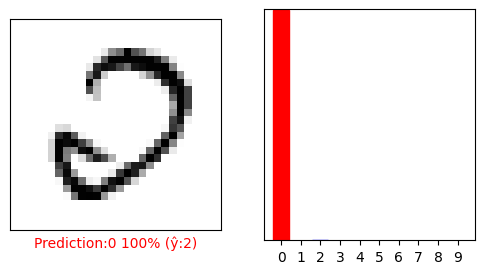

[4.5749819e-04 2.0774249e-03 5.1677161e-01 1.7143083e-01 1.4932078e-03
 1.1410442e-03 3.6716635e-06 8.0375299e-02 2.1878995e-01 7.4594626e-03] , 3


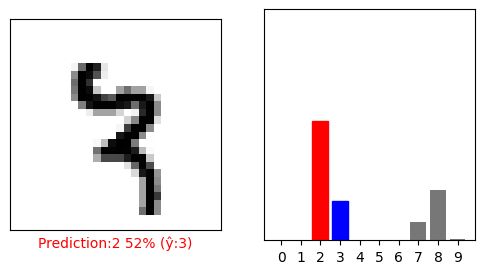

[3.0276009e-03 5.7605826e-03 7.2430368e-05 4.2794624e-04 8.8855588e-01
 4.2606782e-02 5.4254208e-02 4.3196767e-03 8.6652301e-04 1.0833485e-04] , 6


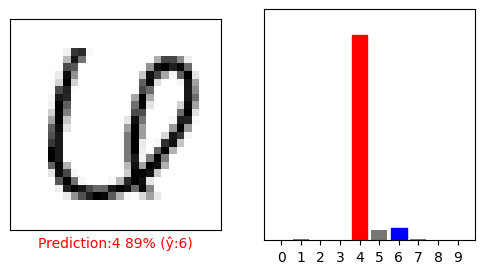

[5.4193801e-09 1.5198854e-08 1.9784212e-08 3.5343921e-06 5.1364845e-05
 2.8654216e-03 2.9018173e-07 8.7280176e-07 1.3195854e-06 9.9707723e-01] , 5


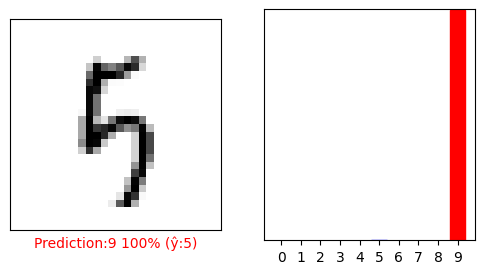

[5.7023410e-15 3.0155360e-13 1.3174303e-13 6.1080418e-15 8.0416854e-03
 3.8242440e-13 1.6851828e-17 2.6835206e-10 5.0769364e-11 9.9195838e-01] , 4


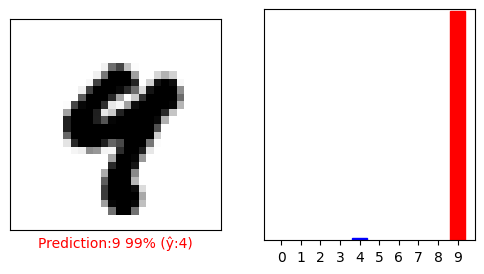

[1.0470426e-06 9.8503345e-01 4.8747637e-08 3.6209757e-14 4.0887542e-09
 8.3977531e-05 1.4874156e-02 2.3771705e-12 7.2491703e-06 2.8723557e-10] , 6


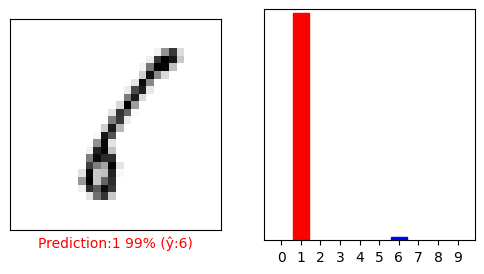

[3.6317471e-02 4.1074974e-05 8.4197982e-06 1.3780429e-03 1.6917416e-05
 1.5082480e-01 5.3449802e-02 2.6980188e-06 7.5305891e-01 4.9018343e-03] , 5


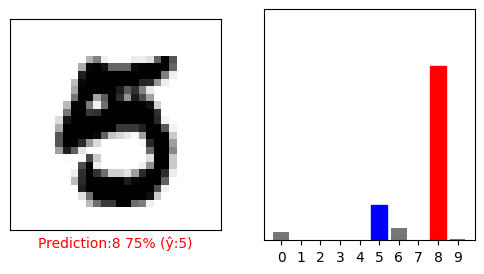

[8.9768147e-01 2.0234569e-05 3.0995801e-07 1.3072159e-07 1.7100905e-06
 1.4998892e-06 4.3236152e-03 2.5041553e-09 9.7970545e-02 5.2116781e-07] , 8


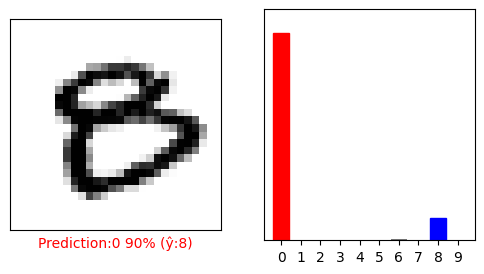

[6.3604870e-18 1.5121179e-10 3.7549753e-14 9.9891841e-01 6.6094717e-18
 1.0815628e-03 1.8278537e-16 1.1588260e-10 1.3234822e-09 3.7880321e-09] , 5


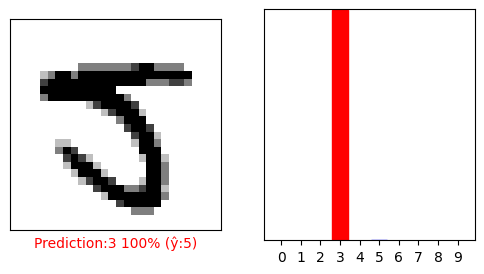

[6.3990331e-01 1.1241372e-07 1.1597809e-04 9.0004545e-07 3.6681902e-02
 4.7630792e-06 3.2321793e-01 1.8211638e-07 2.5424190e-05 4.9508286e-05] , 9


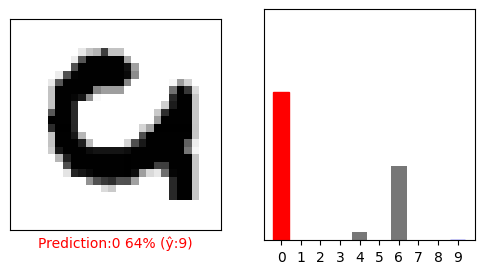

[1.2476920e-05 5.6584994e-04 8.3683091e-01 3.6749378e-04 3.4737328e-05
 6.5307987e-08 7.0782087e-05 1.6211383e-01 3.8892299e-06 1.0166202e-10] , 7


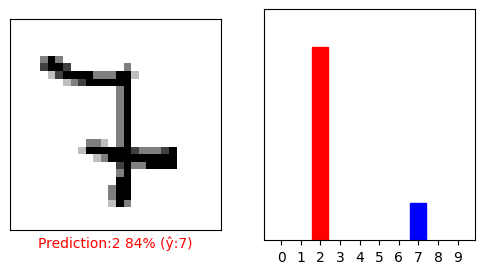

[7.8867946e-10 9.9774975e-01 5.4499956e-09 4.4783708e-12 2.1987797e-03
 8.8984592e-12 6.5179429e-12 2.2554817e-08 1.1430487e-08 5.1505034e-05] , 9


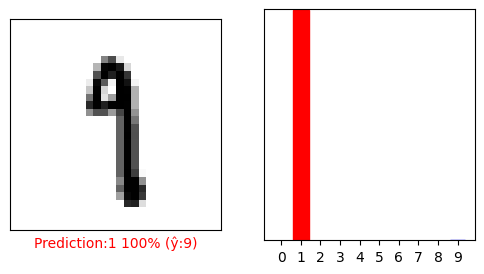

[3.7151148e-07 5.9067372e-07 4.4671324e-08 3.9096814e-01 3.2154567e-06
 6.3801808e-03 6.8614592e-10 1.7261013e-05 1.8745920e-04 6.0244274e-01] , 3


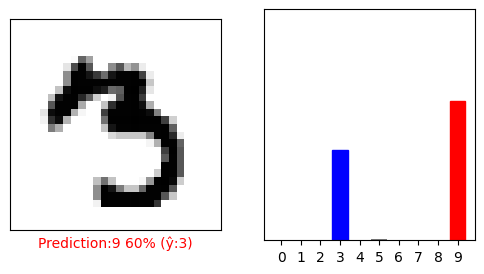

[3.13179285e-14 1.17481505e-13 6.60503423e-12 1.54306093e-17
 6.81662327e-03 1.05299866e-10 2.06896043e-16 9.93183434e-01
 1.75352856e-15 1.17991061e-09] , 4


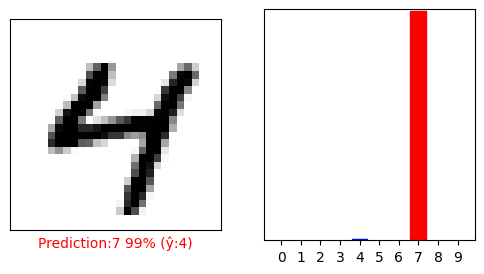

[1.5046074e-12 1.1467440e-10 3.6442923e-12 1.3140627e-12 1.5520711e-01
 1.5395428e-11 4.5209330e-14 2.9034324e-09 6.2788663e-12 8.4479296e-01] , 4


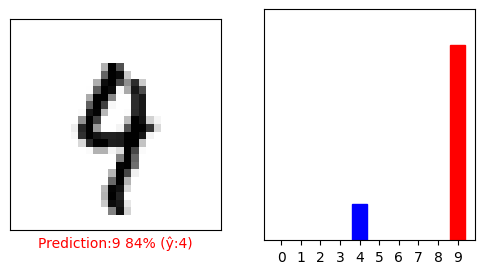

[4.2099029e-05 3.0843723e-05 6.1094455e-02 6.2171568e-13 9.3876755e-01
 1.7269242e-08 5.0401508e-05 1.4496376e-05 1.3379304e-07 4.7385434e-08] , 2


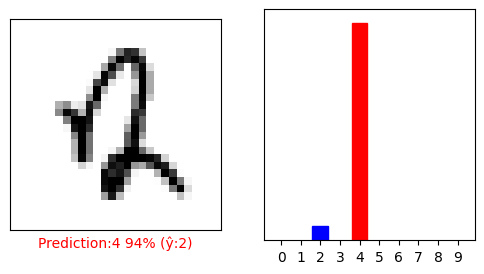

[1.1440502e-10 2.1909062e-04 1.2638020e-07 5.0925064e-01 1.5425925e-09
 1.2754905e-01 3.5791248e-09 2.1523741e-09 3.1447512e-01 4.8505921e-02] , 5


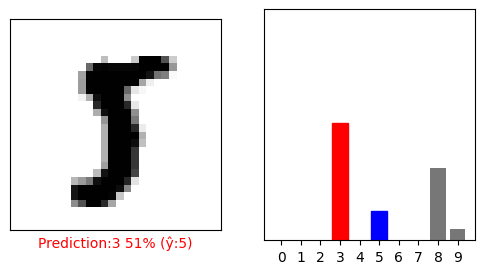

[2.0969256e-14 2.2028557e-10 3.3351071e-08 9.9953949e-01 2.8502608e-14
 1.1969813e-04 3.1357654e-14 4.0040971e-16 3.4012174e-04 6.2883555e-07] , 5


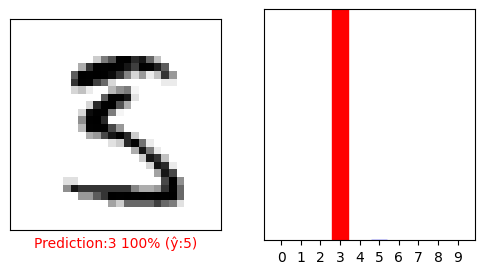

[2.4935827e-05 1.1789798e-01 3.2840795e-03 7.4545018e-02 7.9571164e-01
 8.1530134e-06 9.3564427e-09 4.8767072e-03 1.9413081e-03 1.7100659e-03] , 7


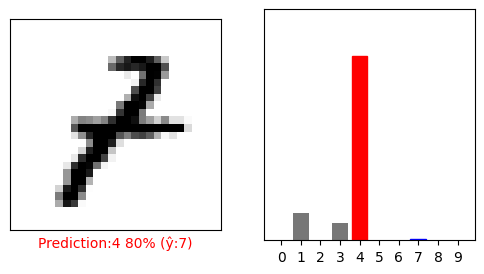

[9.9662918e-01 1.8894973e-06 1.2344106e-03 8.0267346e-05 1.3881265e-07
 1.0556611e-03 1.5319679e-04 8.6661203e-08 1.9521054e-04 6.4995291e-04] , 9


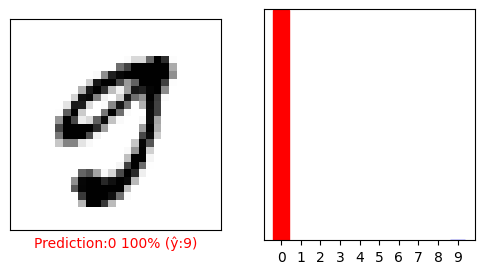

[5.2108925e-11 9.9992549e-01 3.9408943e-09 9.9562497e-15 7.3919400e-05
 1.1142902e-14 1.0993719e-09 4.9831504e-14 5.7664806e-07 4.9732223e-09] , 6


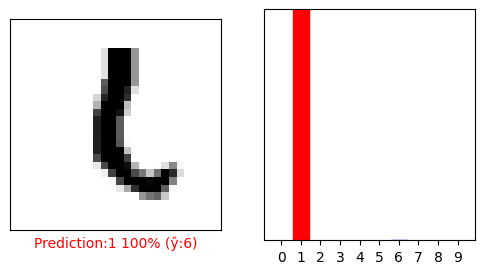

[2.1267620e-01 5.3192541e-04 2.9337483e-03 2.5150362e-05 8.1087160e-07
 2.6808088e-05 1.9899768e-05 6.7996993e-08 7.8378463e-01 7.6788331e-07] , 0


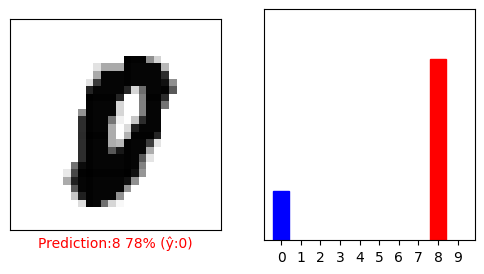

[6.0042318e-12 3.3074830e-08 5.7269413e-06 2.1090862e-13 7.8492230e-01
 9.3056413e-12 1.1044089e-14 2.1507201e-01 7.7657282e-12 1.1872882e-09] , 7


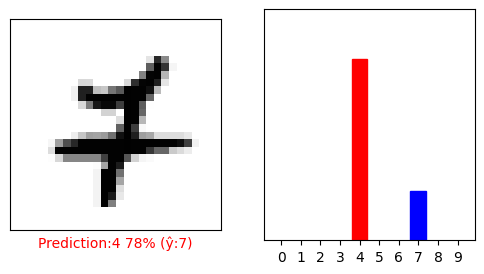

[3.8517477e-08 3.3053930e-04 2.4270983e-07 1.2939131e-05 1.0921698e-06
 3.6090717e-02 6.0995717e-07 2.5578913e-08 9.4633079e-01 1.7233117e-02] , 5


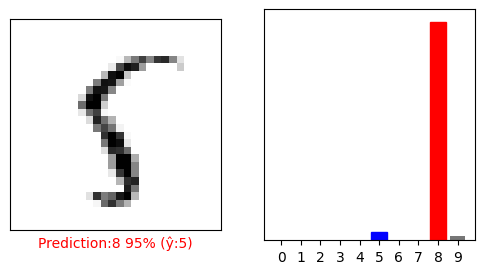

[1.7327304e-09 4.5999258e-08 4.3616022e-10 8.1744067e-05 1.3919190e-07
 2.5047594e-01 4.4922889e-08 6.2689601e-08 3.5554342e-04 7.4908638e-01] , 5


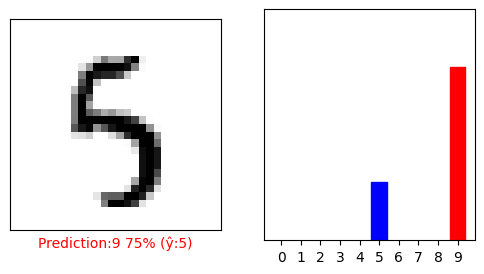

[5.8902156e-13 3.4582129e-08 9.4888951e-13 8.6383789e-11 5.8679593e-01
 2.9666290e-11 8.0861119e-15 5.0176565e-09 1.5577081e-11 4.1320401e-01] , 9


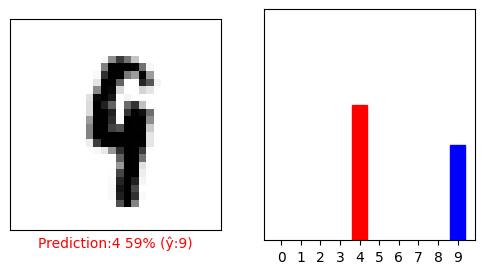

[9.9021661e-01 2.7574101e-09 1.6022243e-07 4.6042423e-08 1.7206734e-08
 4.6924589e-07 9.2313159e-03 1.8786375e-09 5.5034959e-04 1.1480229e-06] , 8


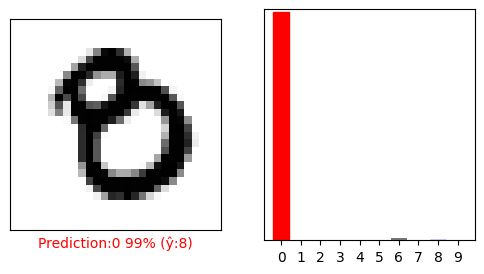

[1.8990223e-08 3.9960170e-05 2.6618059e-06 9.7365701e-01 9.1242169e-09
 1.8946291e-09 5.0197260e-12 2.4827469e-02 1.4728199e-03 7.0553057e-08] , 7


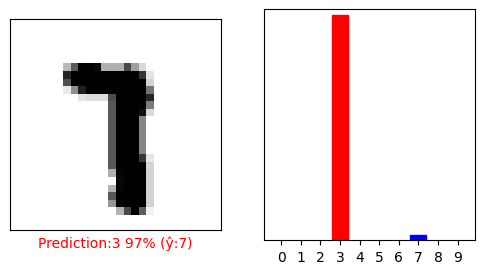

[1.3316533e-02 3.2100888e-05 2.2620072e-03 3.0920685e-03 2.2799038e-06
 4.8904616e-07 1.9947032e-05 8.7476600e-08 9.8127329e-01 1.2022110e-06] , 3


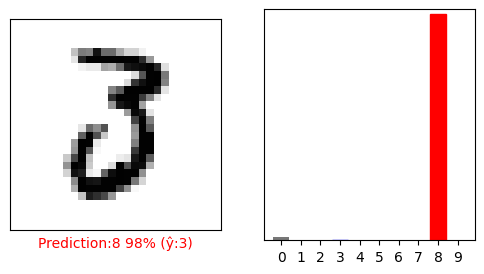

[3.5913661e-09 7.1291943e-08 8.4230560e-01 1.5768924e-01 1.0730042e-08
 7.1112545e-08 5.2052607e-10 3.0422189e-06 1.9601471e-06 2.9032782e-16] , 3


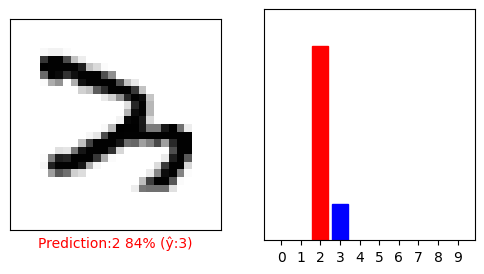

[1.9612689e-07 1.1433650e-15 1.1609851e-15 4.3734759e-13 2.4752705e-10
 8.2986880e-09 2.3048074e-11 9.9999976e-01 1.4749076e-15 4.7457475e-11] , 9


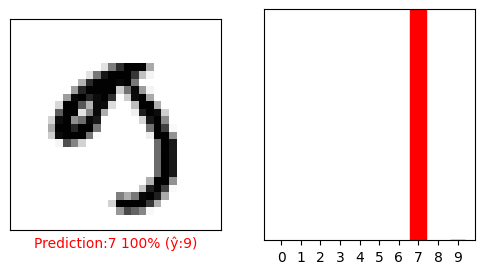

[7.4159470e-05 1.3453432e-02 8.3472500e-05 2.5940019e-06 1.7048392e-04
 1.2406068e-04 3.2753053e-03 1.8868777e-06 9.8249465e-01 3.1998401e-04] , 6


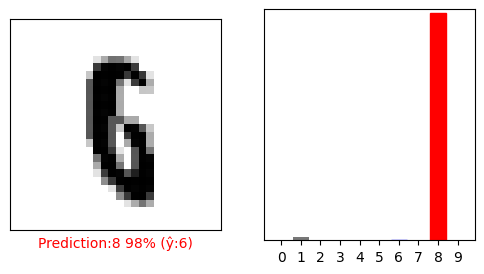

[3.3934808e-15 2.7552596e-06 9.9999726e-01 2.1040834e-12 3.1644673e-14
 5.3872156e-17 6.3565245e-13 2.7373812e-10 3.2597698e-12 3.5572494e-21] , 1


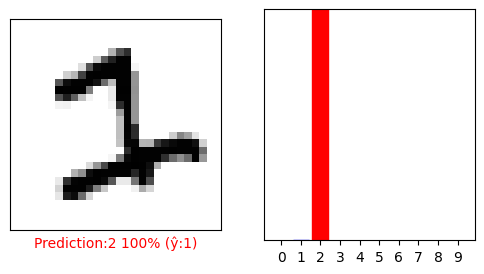

[2.9291792e-07 7.2048421e-09 1.7140687e-07 1.0139596e-06 1.3613331e-02
 4.0717620e-01 3.2710561e-09 3.5962104e-05 1.9087601e-07 5.7917285e-01] , 5


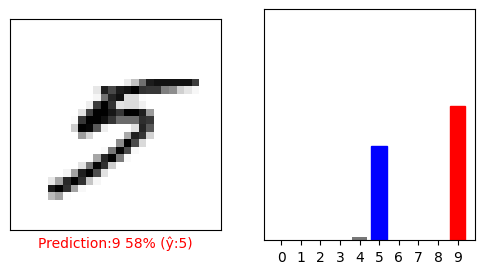

[6.10965190e-09 5.93044660e-06 1.09384381e-07 4.48873267e-04
 1.79993082e-03 1.45505619e-04 2.02496520e-10 1.15195464e-04
 5.95868457e-08 9.97484326e-01] , 5


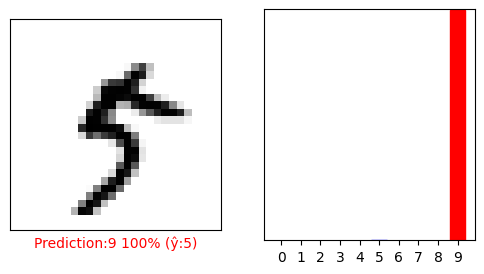

[5.0029466e-05 3.9956761e-03 5.8584104e-05 2.3432253e-02 1.4137565e-03
 5.8887428e-05 3.0782161e-07 1.4395013e-02 1.8871380e-01 7.6788163e-01] , 7


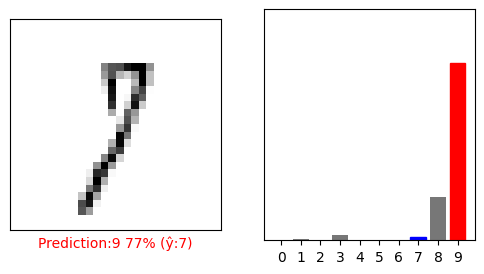

[1.4344768e-06 1.9291041e-05 2.1872354e-05 7.8468811e-04 7.9240985e-03
 2.0366415e-04 1.9447096e-08 2.1945192e-03 7.4579842e-02 9.1427058e-01] , 8


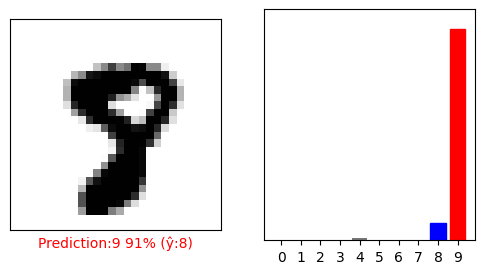

[1.7046335e-10 9.9846715e-01 1.9517270e-10 1.9815831e-12 1.4823710e-03
 7.5857560e-13 3.7058979e-13 1.9508797e-09 3.8689333e-08 5.0439121e-05] , 9


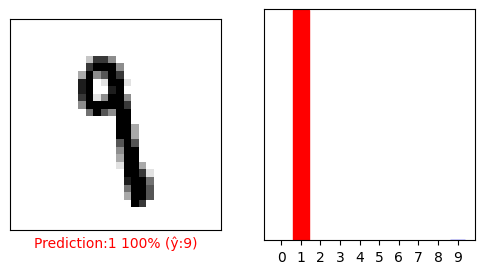

[1.0868336e-13 7.1687272e-20 9.7389432e-08 1.6577566e-18 9.2608118e-01
 2.0187144e-05 1.2530920e-09 7.3898539e-02 1.5222190e-13 4.3669273e-09] , 6


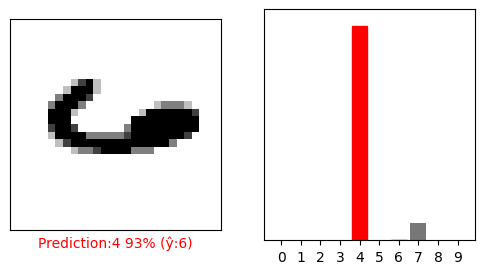

[8.9304667e-05 4.8666386e-04 8.7424827e-01 1.0580493e-01 8.9312336e-05
 8.0954842e-06 5.3798727e-04 1.5687634e-04 1.8578462e-02 2.1668192e-09] , 3


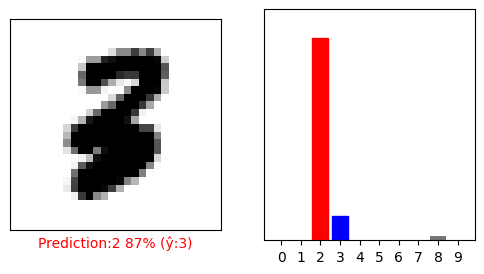

[9.9989641e-01 8.3056869e-12 2.2416601e-10 7.6079955e-06 4.6400443e-09
 3.3501324e-06 9.2572358e-05 2.1147453e-09 1.1388938e-08 2.6738100e-08] , 5


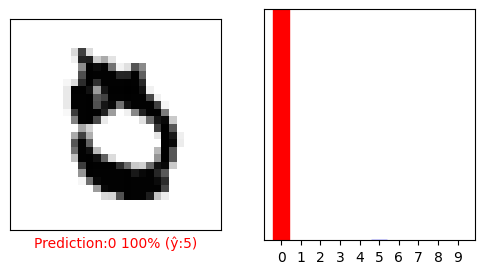

[3.7173080e-09 6.0090514e-08 1.6059079e-07 2.3422085e-11 5.8245927e-01
 2.2158833e-08 2.5969052e-10 1.8828416e-07 5.1051754e-09 4.1754034e-01] , 9


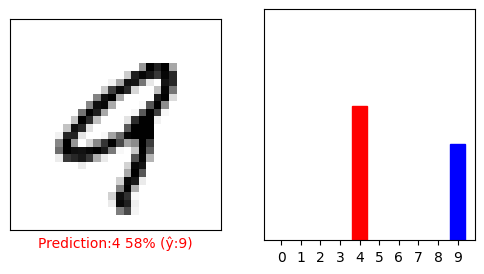

[2.2950468e-07 1.4139206e-02 4.3613352e-05 1.1932886e-03 9.2521632e-01
 4.1448753e-02 2.1780154e-06 1.7744908e-04 2.5505982e-03 1.5228373e-02] , 5


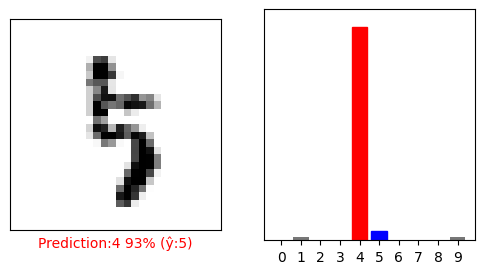

[3.8611956e-03 3.4604422e-03 1.3254647e-02 1.3674116e-02 8.4793180e-01
 6.9918386e-03 2.0108314e-04 5.2485686e-02 1.8785283e-02 3.9353896e-02] , 8


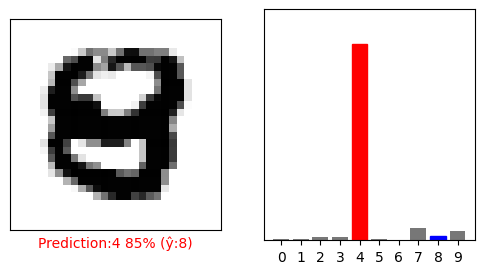

[1.1454365e-06 4.3011308e-03 5.2631706e-01 2.3738912e-03 8.6914643e-04
 2.8983454e-08 1.0682799e-07 4.6611699e-01 2.0494483e-05 4.6266955e-08] , 7


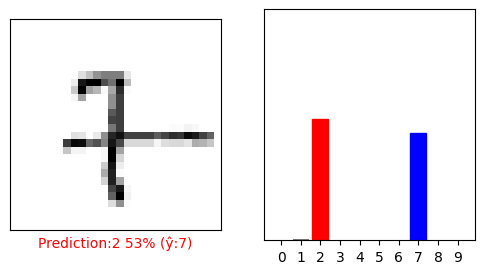

[2.6695497e-13 6.3838830e-12 1.4265937e-11 9.6573652e-12 1.0099198e-18
 3.6328840e-09 1.3495998e-12 1.4737633e-19 1.0000000e+00 3.1031292e-13] , 5


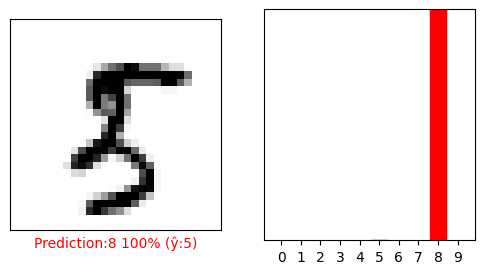

[3.0088070e-06 7.3860777e-03 2.5443748e-01 2.1139673e-05 5.6486912e-11
 6.5901135e-10 9.2122443e-10 1.0646917e-06 7.3815119e-01 1.4427960e-10] , 2


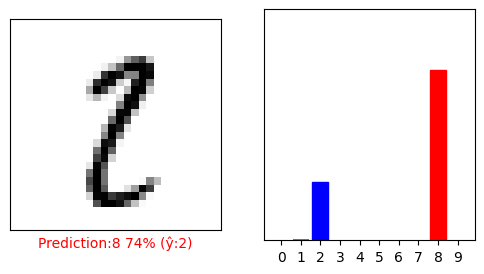

[1.3228607e-03 3.0883250e-01 1.1832451e-01 2.6699218e-01 1.2304749e-08
 4.7157862e-08 8.5027914e-09 2.2417586e-01 8.0328144e-02 2.4081643e-05] , 7


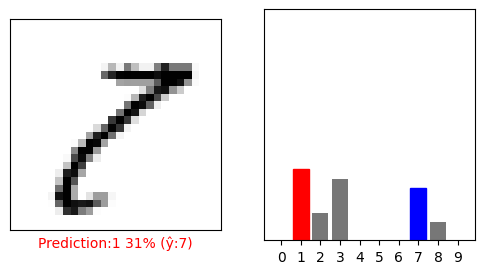

[7.1871346e-01 6.5352276e-07 2.8110150e-01 9.8071905e-05 6.3778489e-06
 6.6820194e-09 1.3243685e-05 3.3297113e-06 5.6370620e-05 7.0570104e-06] , 2


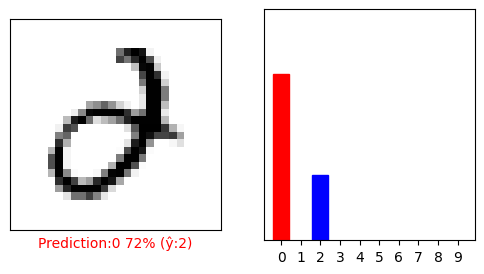

[2.4122918e-02 5.7533008e-16 6.6313865e-16 4.6789839e-18 3.6667334e-06
 2.5174605e-09 9.7587341e-01 2.9366454e-11 1.0147551e-12 3.4332129e-12] , 0


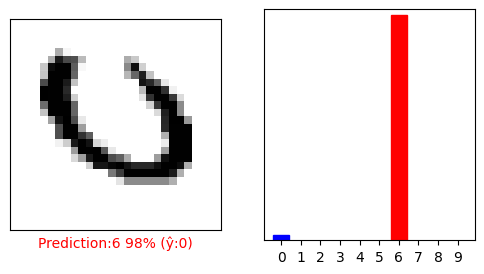

[8.9913380e-01 1.0797421e-07 4.1549361e-06 2.2581862e-07 2.7386785e-10
 2.3081391e-06 1.0085881e-01 1.5893802e-08 4.6121463e-07 2.5175590e-08] , 6


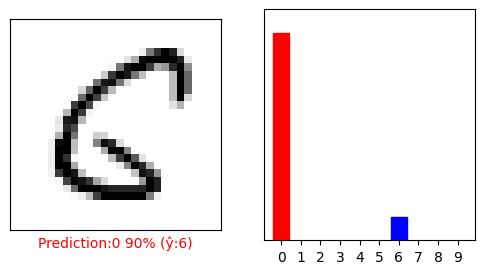

[2.9767750e-04 3.0467536e-08 2.2362183e-07 2.3994314e-06 6.3889627e-07
 6.1797467e-03 9.8930234e-01 3.6692538e-07 4.2163921e-03 7.8640795e-08] , 5


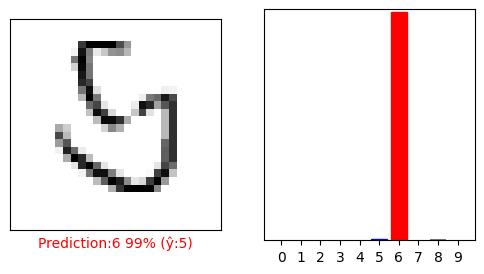

[4.2055365e-12 2.6078907e-01 2.7304901e-02 6.5277278e-01 4.8288682e-12
 7.0878470e-13 1.5226781e-14 5.9133299e-02 1.2505659e-10 3.0905996e-12] , 1


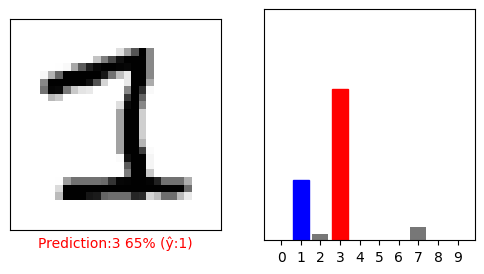

[1.8473976e-06 9.9926663e-09 1.0934599e-02 3.2046834e-14 9.0689793e-02
 3.4621164e-10 8.9837372e-01 1.1341551e-11 2.6055075e-11 3.0263491e-17] , 4


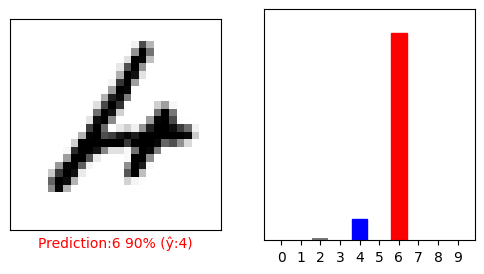

[4.2986406e-07 4.2421689e-06 2.9054332e-01 4.3683831e-02 5.8655411e-01
 1.0405066e-08 3.6131096e-09 1.2638182e-11 7.9214148e-02 3.6010107e-15] , 3


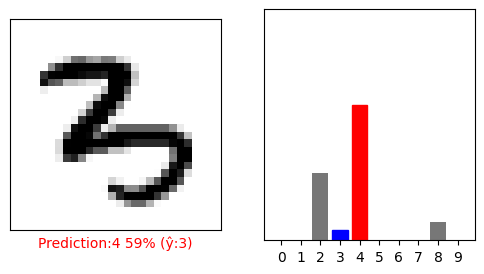

[6.23986685e-09 1.47083892e-06 9.66870129e-01 3.30228806e-02
 2.29918218e-09 6.76748380e-10 1.21491670e-08 3.31548108e-06
 1.02112186e-04 1.39953628e-13] , 3


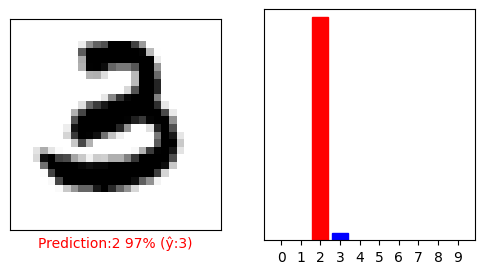

[0.00146407 0.5060376  0.00173132 0.0015916  0.02540814 0.00145789
 0.00069121 0.34780067 0.00775632 0.10606113] , 7


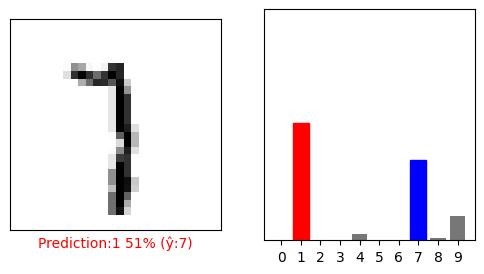

[1.10470735e-13 5.51902187e-12 1.53757730e-13 4.13823062e-14
 7.48543143e-01 1.70443206e-12 5.65174687e-15 1.37672131e-11
 5.75364626e-13 2.51456827e-01] , 9


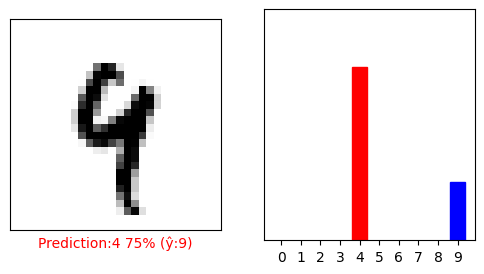

[1.2637392e-09 1.6122276e-09 1.0684121e-08 4.0657543e-08 6.1941254e-03
 2.9737628e-05 4.8284743e-10 4.7964051e-09 7.8591585e-01 2.0786026e-01] , 9


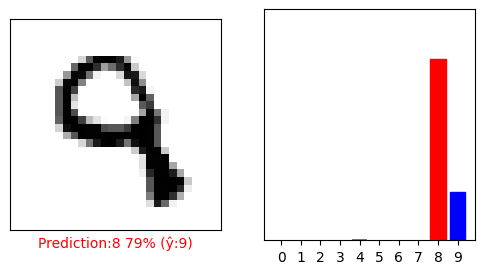

[2.7210420e-02 6.6259786e-02 2.3264690e-01 4.1207504e-02 4.0435442e-01
 1.2757434e-03 7.1755326e-03 2.1388674e-01 5.6845560e-03 2.9841153e-04] , 7


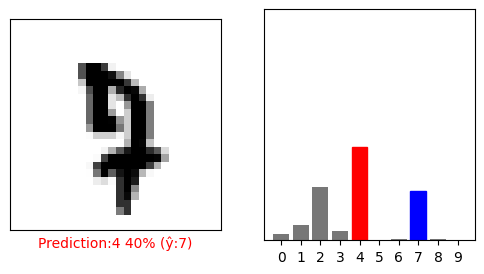

[4.1553149e-01 4.2883988e-04 5.6395078e-01 4.6924688e-03 5.2037602e-04
 7.1886127e-05 8.7882113e-03 3.6857647e-03 2.1884404e-03 1.4173989e-04] , 0


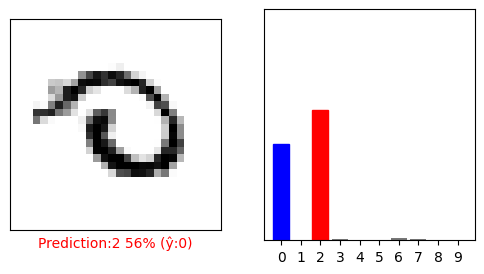

[3.01561831e-05 3.07498485e-05 1.47696279e-04 2.14035287e-02
 1.66994705e-05 1.05902844e-04 4.30787480e-07 3.29244591e-04
 7.85286307e-01 1.92649260e-01] , 9


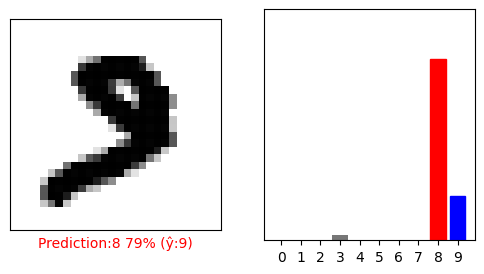

[9.9685931e-01 1.2110373e-04 8.0963859e-04 1.7833779e-07 5.1060948e-07
 2.6836307e-04 8.5201714e-04 1.0573190e-03 2.9568584e-05 2.0314662e-06] , 9


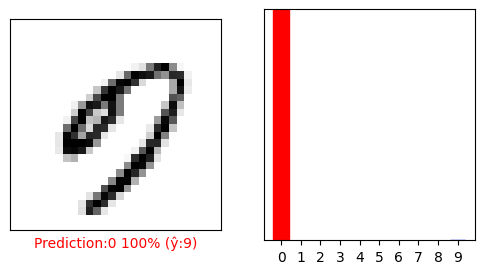

[2.0378871e-10 7.7191873e-12 9.9146280e-05 3.8103473e-10 1.8389296e-10
 5.8801237e-07 1.1017349e-08 9.9050927e-01 9.3909297e-03 9.3347003e-15] , 2


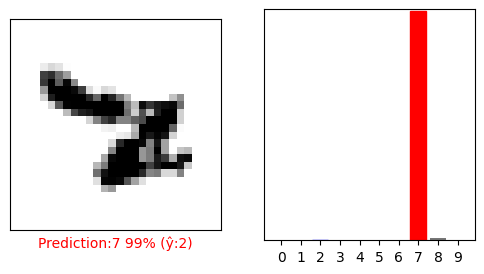

[2.3670973e-04 1.4677013e-01 4.4063078e-03 2.8291442e-03 1.7432941e-02
 2.2547722e-03 1.3277521e-05 8.4862679e-02 4.4147414e-03 7.3677927e-01] , 7


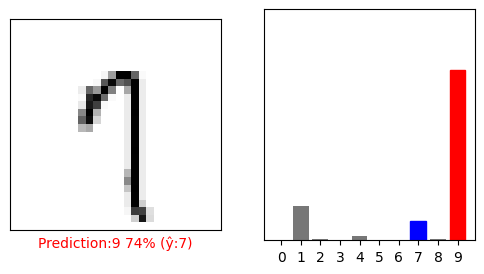

[1.7147635e-05 8.0590973e-05 6.1023085e-05 4.2203581e-04 6.2899286e-04
 4.0256597e-05 5.6333800e-08 7.2405511e-01 4.6171737e-04 2.7423295e-01] , 9


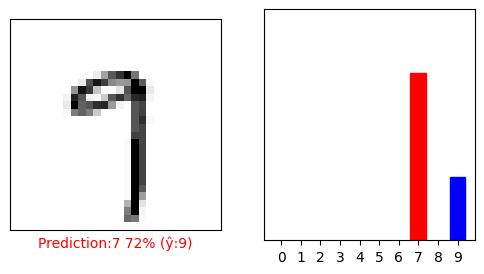

[7.2410092e-04 5.4374523e-05 3.9671499e-02 5.0726608e-06 2.8466966e-04
 4.7425733e-06 4.6211641e-04 1.0978567e-05 9.5803589e-01 7.4652088e-04] , 2


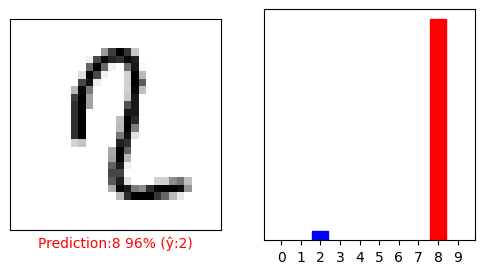

[4.5618700e-09 2.8726150e-04 3.4282980e-08 1.9256921e-08 8.5539824e-01
 4.4547605e-08 2.4296629e-09 2.3704261e-07 1.3691819e-08 1.4431418e-01] , 9


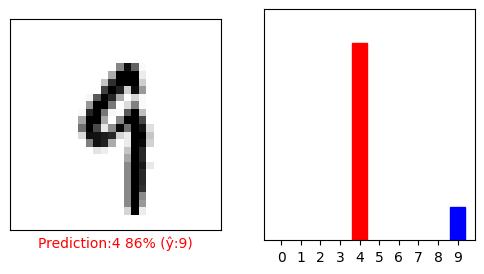

[1.5011586e-03 1.4153816e-10 5.4245188e-11 2.6928794e-07 3.9267873e-09
 1.5683690e-01 8.4162015e-01 9.1277901e-09 1.2299244e-06 4.0335606e-05] , 5


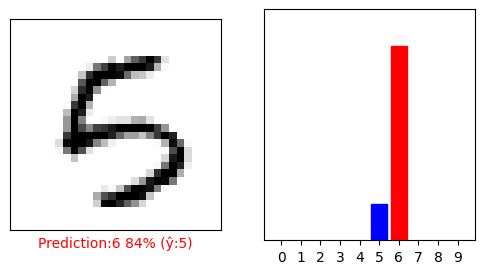

[8.1266089e-06 8.0237442e-05 1.7165701e-01 2.2242071e-02 7.5395365e-05
 3.1044492e-05 4.7134612e-09 7.5898927e-01 4.6907935e-02 8.9181622e-06] , 2


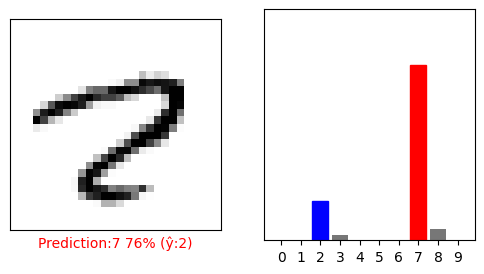

[4.6406445e-10 3.0852005e-27 1.9749826e-21 1.2914481e-14 1.0896344e-18
 9.7030506e-06 1.8529021e-17 9.9999011e-01 7.2394411e-21 1.8431533e-07] , 9


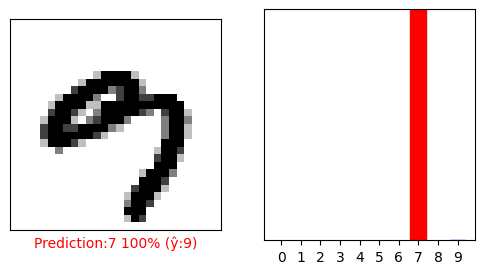

[3.3995760e-09 1.4723359e-07 6.9497665e-09 4.7272328e-01 1.0538861e-07
 3.9175639e-01 1.3968735e-06 4.0701105e-09 1.0042313e-03 1.3451444e-01] , 5


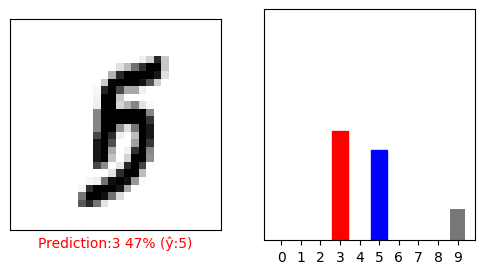

[9.5817905e-09 1.8618215e-12 5.1381965e-11 6.9110438e-02 4.8261932e-13
 6.4699794e-05 1.4003295e-13 6.5557624e-12 1.4662329e-04 9.3067813e-01] , 3


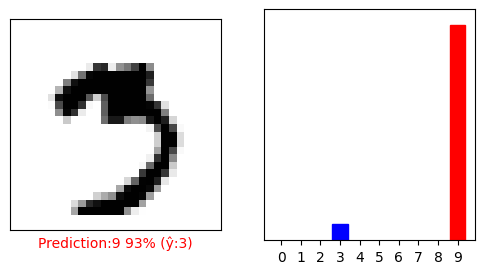

[3.2976852e-04 4.7810865e-03 1.3213749e-02 7.9188573e-01 6.0787788e-06
 1.7134053e-01 6.5975873e-05 1.8057076e-02 2.1902562e-04 1.0094804e-04] , 5


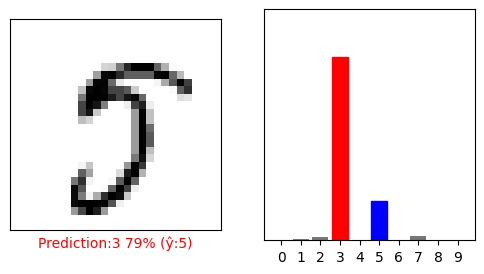

[1.3286989e-09 2.4507062e-07 6.0735033e-07 8.3820516e-01 1.2729542e-07
 6.2113315e-02 1.0321773e-10 3.4687526e-09 1.2324096e-04 9.9557385e-02] , 5


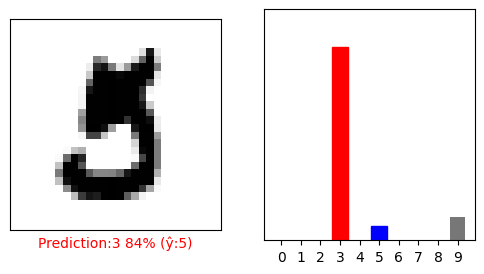

[8.05449796e-14 1.37016735e-11 1.41297496e-13 2.64102520e-12
 5.59923470e-01 2.21034288e-10 2.09927866e-14 2.37253134e-11
 2.99587334e-11 4.40076560e-01] , 9


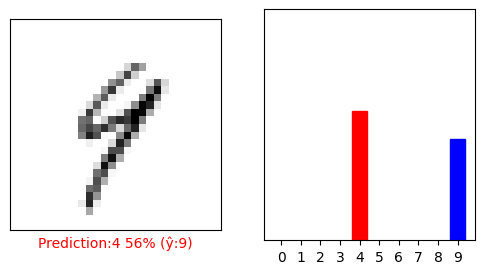

[7.6864872e-08 6.9758769e-08 1.4838547e-07 2.0242938e-10 8.4540695e-01
 4.3332280e-09 5.4628808e-11 9.0950138e-08 4.8267335e-08 1.5459256e-01] , 9


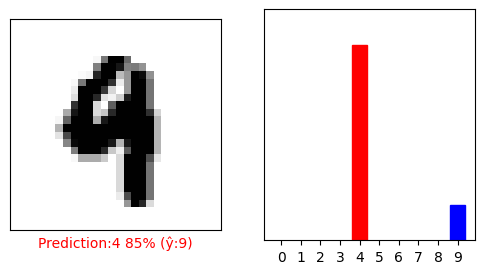

[3.3490422e-11 1.1580966e-06 8.7196332e-01 9.0887504e-08 2.1079477e-04
 2.4328737e-15 3.4601827e-13 1.2782460e-01 8.6358871e-15 7.6811226e-15] , 7


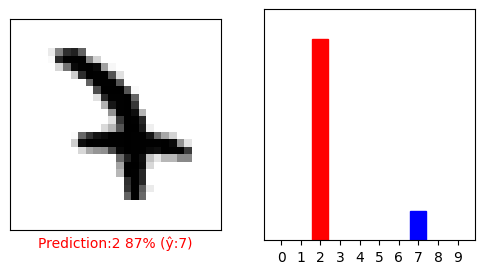

[1.32451845e-08 1.48031108e-06 2.74016038e-02 1.11567460e-04
 2.45423820e-07 2.14799869e-07 1.25425240e-10 6.74030244e-01
 2.98454583e-01 1.12000953e-09] , 8


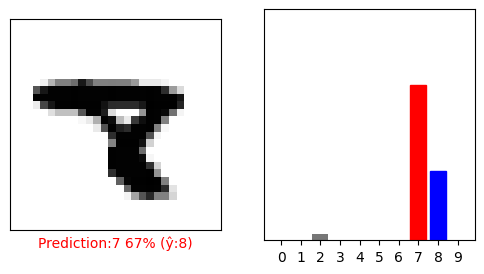

[1.5709975e-07 5.6153512e-01 1.4864659e-07 5.8241049e-08 9.1382964e-03
 1.0035837e-07 9.3850860e-10 2.4005312e-06 1.8281666e-05 4.2930549e-01] , 9


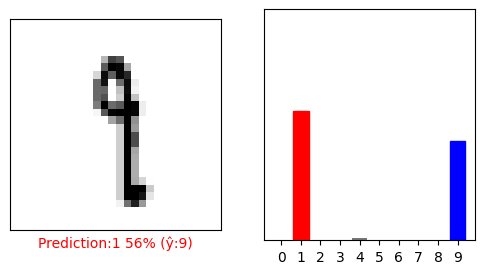

[1.42988188e-09 1.44117124e-16 6.63500646e-19 4.86427813e-14
 1.23811335e-17 5.03482759e-01 4.96517241e-01 1.50907390e-15
 5.00399189e-08 2.85649161e-11] , 6


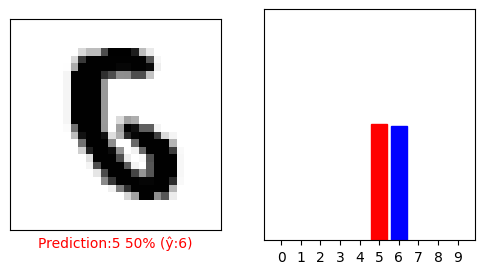

[3.9298838e-18 2.2566377e-08 1.1340885e-14 8.9772969e-01 7.5390599e-10
 4.5159134e-15 2.3547963e-22 1.0226942e-01 3.8785756e-11 8.2505147e-07] , 7


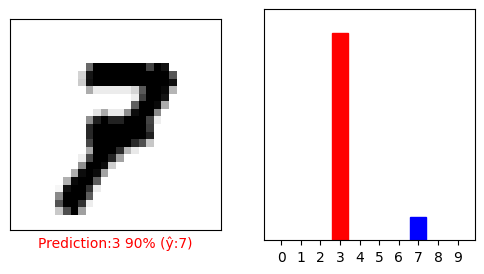

[9.9939537e-01 8.9013752e-13 7.0546950e-11 4.5692175e-08 6.9794211e-08
 1.0469486e-10 6.0334912e-04 6.6743486e-11 1.5009776e-07 1.0782887e-06] , 6


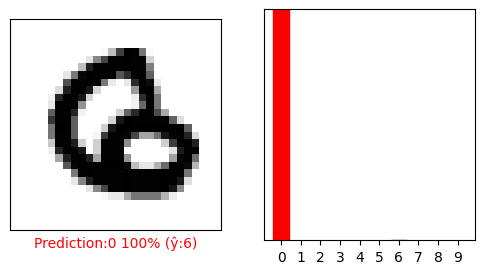

[6.9503549e-05 4.6968714e-12 2.0138395e-01 1.0429658e-10 6.3369769e-01
 3.6035226e-06 1.6484523e-01 7.4459716e-10 2.1706945e-10 1.4377636e-13] , 2


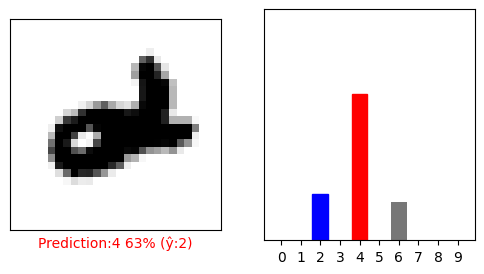

[3.7443017e-06 2.1941133e-01 1.9478989e-03 8.1303693e-02 1.3831144e-06
 3.4425192e-09 1.0997312e-08 4.0831605e-01 2.8901148e-01 4.4606627e-06] , 8


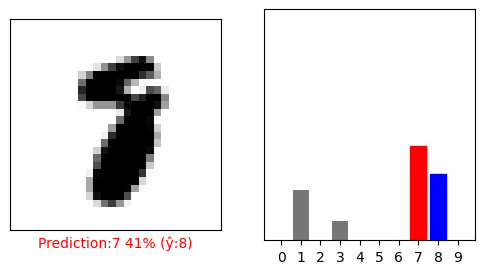

[1.3594781e-05 5.6202840e-02 4.0064580e-03 3.4664866e-01 4.0632492e-01
 1.1738111e-01 3.0507644e-07 6.4845771e-02 1.6067925e-05 4.5601916e-03] , 3


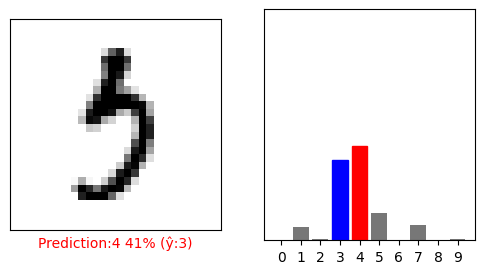

[4.3482795e-10 9.5775908e-07 7.9603485e-10 2.0738716e-08 7.0007104e-01
 1.1814986e-08 5.9691531e-12 1.4417857e-06 6.5116532e-05 2.9986146e-01] , 9


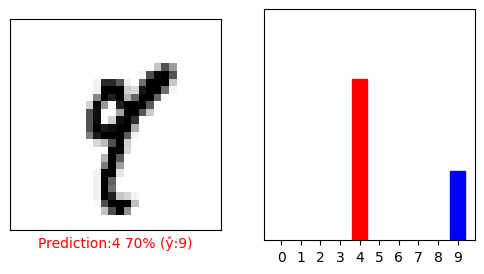

[5.9131920e-01 1.4076963e-03 3.8739681e-04 5.2214239e-02 1.8997774e-04
 2.6611000e-04 1.4463991e-02 5.9593103e-06 3.3959180e-01 1.5362348e-04] , 8


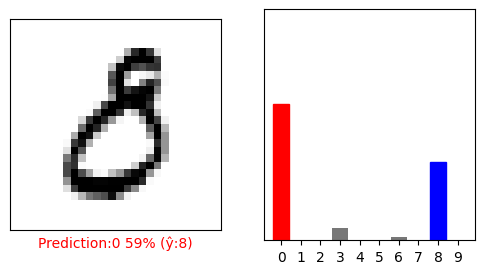

[5.7325426e-02 3.7956852e-04 9.0490939e-05 3.0779654e-05 5.9742397e-01
 5.8241730e-04 3.3806023e-01 1.1611729e-03 1.1351168e-03 3.8108609e-03] , 6


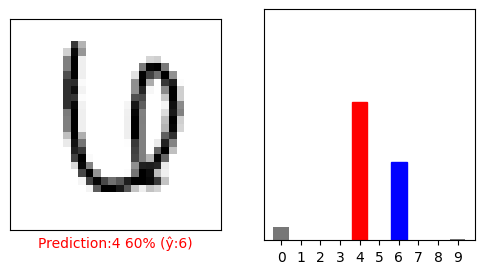

[1.6230794e-08 2.4661724e-09 6.5155341e-08 1.3988288e-09 9.9528474e-01
 4.4313612e-07 5.7127573e-07 1.7517807e-11 3.4791722e-10 4.7142552e-03] , 9


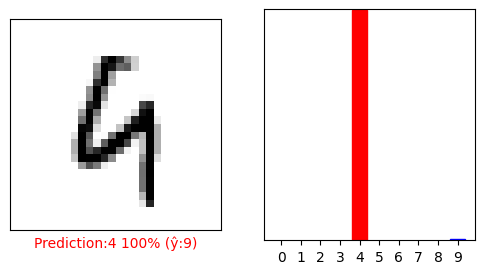

[1.0746575e-09 3.7991139e-09 4.7608149e-01 3.0991343e-15 5.2391845e-01
 8.0313145e-10 9.0573721e-08 2.4305929e-13 4.2662911e-15 6.0637521e-18] , 2


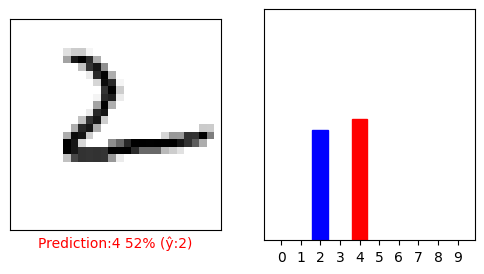

[2.2414805e-04 1.5145476e-05 1.0477887e-03 2.6878684e-08 8.1211561e-01
 1.5503323e-07 7.2809155e-07 3.2635324e-07 8.3177119e-06 1.8658775e-01] , 9


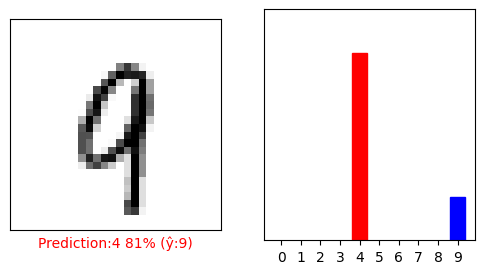

[5.4295319e-06 4.5926310e-05 1.2304550e-05 4.0291960e-07 8.9484358e-01
 4.7569309e-04 1.7600796e-05 2.1989625e-07 9.8738849e-02 5.8600013e-03] , 8


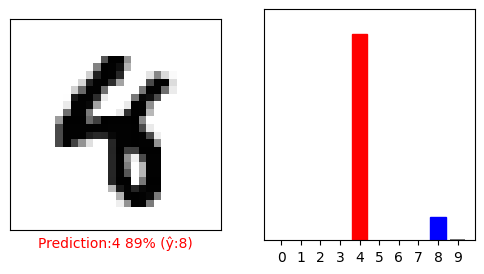

[8.9252330e-09 7.1055175e-14 7.7586343e-10 3.5300244e-16 7.8516835e-01
 7.8134451e-07 2.1483085e-01 1.5697977e-12 8.7980040e-11 4.7492442e-08] , 6


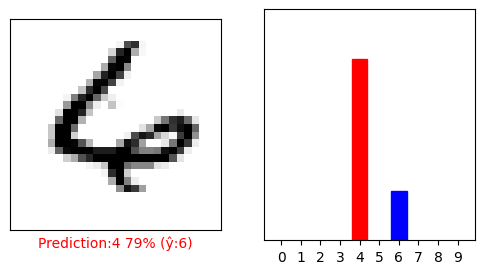

[1.1168658e-05 1.6336035e-02 3.3483424e-03 5.2072562e-11 4.7164601e-03
 3.7094550e-10 9.7553158e-01 2.1772599e-10 5.6428104e-05 1.3316470e-12] , 1


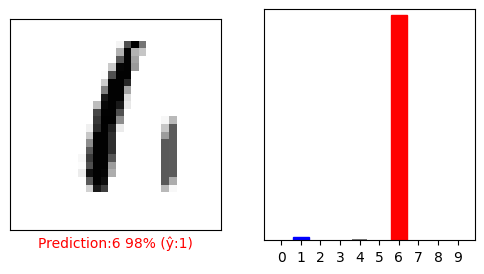

[2.6272904e-04 2.5447165e-03 3.3930002e-05 8.2257486e-08 3.1608316e-08
 8.2611997e-09 3.3203349e-08 7.2127343e-10 9.9715853e-01 9.8370441e-09] , 1


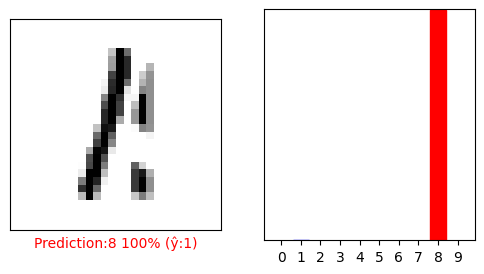

[6.43914998e-01 1.41566943e-06 2.20176044e-05 2.53139039e-08
 4.84922737e-07 1.76192728e-07 3.53685732e-06 3.07045198e-08
 3.55951399e-01 1.05889405e-04] , 8


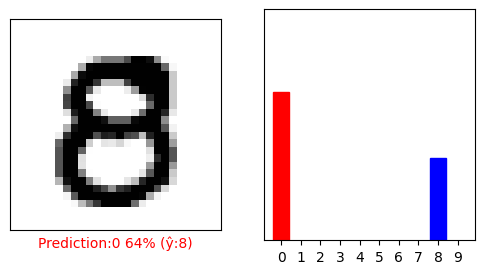

[1.4212576e-08 1.1339577e-08 1.0502728e-08 1.6084792e-01 5.6448110e-11
 8.3568811e-01 1.4122353e-11 9.0024037e-11 7.4278624e-08 3.4638587e-03] , 3


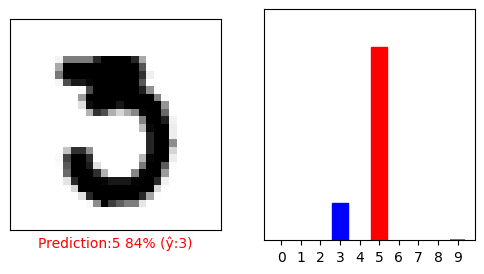

[3.9994984e-07 4.0242874e-05 7.1069664e-01 2.7256930e-02 5.7592389e-09
 1.0169977e-07 4.3478773e-11 1.1763317e-02 2.5024062e-01 1.7613963e-06] , 7


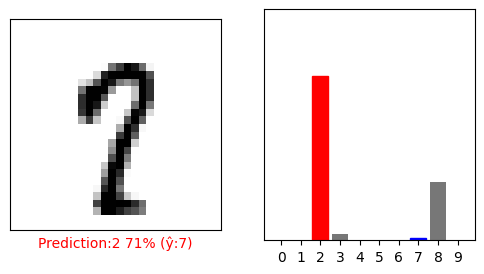

[4.53604301e-08 5.30628264e-10 9.94621396e-01 5.25919627e-03
 5.71725523e-12 3.22566578e-08 4.20334503e-13 1.19213946e-04
 1.45122371e-07 7.60905472e-09] , 3


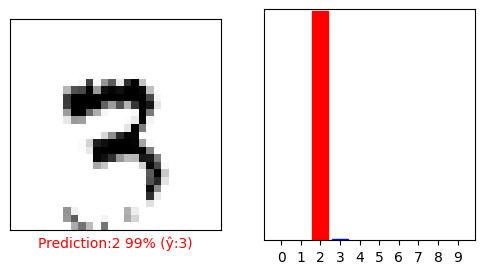

[4.1125689e-02 5.6598979e-05 2.9128589e-06 6.9660845e-04 6.1134509e-05
 2.0454653e-01 6.0454782e-02 2.8553055e-05 3.0331984e-03 6.8999404e-01] , 5


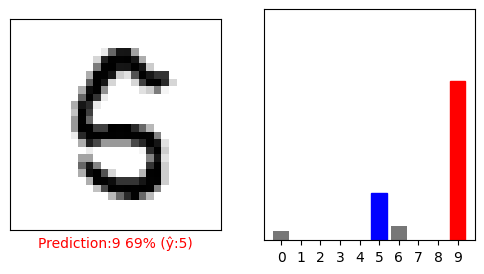

[3.0943199e-12 3.4105110e-08 4.7330007e-09 5.3369069e-01 5.7919572e-11
 3.9714536e-01 5.5250634e-13 7.4497977e-11 1.2628102e-06 6.9162712e-02] , 5


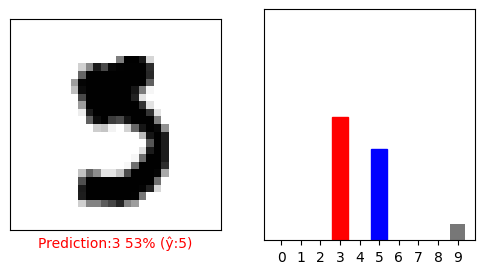

[7.4092830e-05 6.9827797e-06 3.3937667e-05 5.9817374e-02 6.7307604e-07
 1.5101888e-05 6.3168284e-07 7.3389859e-09 9.1172254e-01 2.8328625e-02] , 3


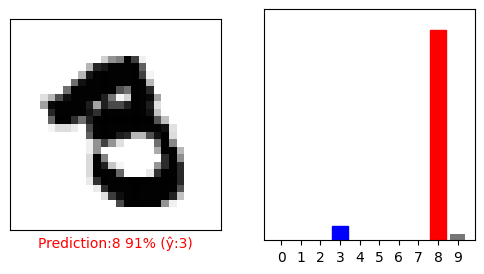

[5.1326988e-06 7.2296139e-08 1.3046024e-07 4.9191248e-04 5.1693149e-08
 3.1633977e-06 1.8547352e-07 3.6655895e-10 9.4010335e-01 5.9396017e-02] , 3


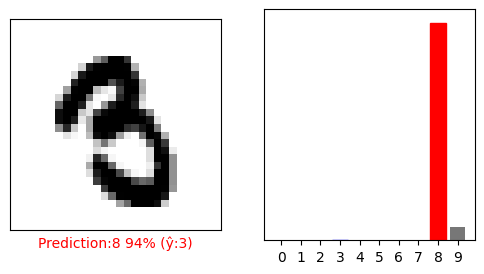

[1.0146792e-09 9.6269564e-12 1.8676165e-12 8.5050544e-07 3.7965453e-09
 1.2826094e-03 2.6711430e-12 9.7293795e-10 2.6616826e-07 9.9871635e-01] , 5


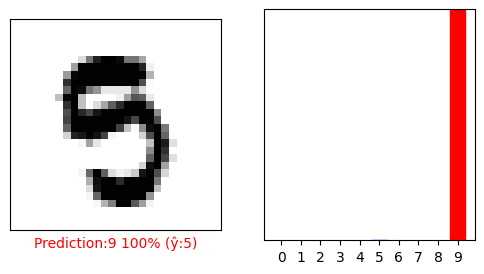

[4.3897958e-07 3.1173638e-08 3.3145827e-08 1.8592551e-03 1.1427347e-07
 2.8909944e-02 1.2699353e-08 1.7849279e-08 2.9807689e-04 9.6893209e-01] , 5


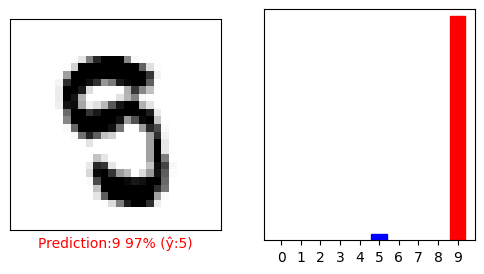

[4.8590548e-10 2.0714742e-07 2.7486669e-08 2.2617631e-01 1.2465441e-08
 1.9659994e-04 9.3303663e-12 2.8064031e-09 2.4575382e-03 7.7116925e-01] , 3


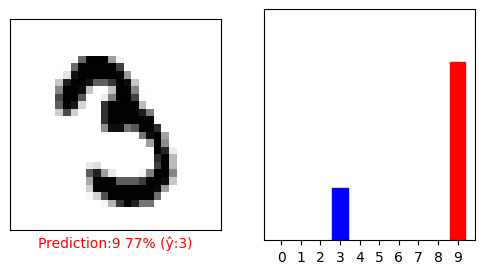

[7.0761922e-03 1.0289525e-07 4.1971109e-07 6.6895894e-04 4.2506775e-07
 8.3099240e-03 5.9010370e-07 3.0835211e-06 5.7691109e-06 9.8393458e-01] , 3


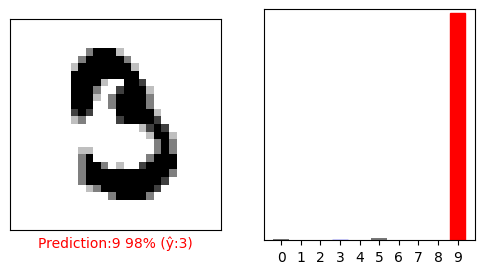

[9.26786186e-07 6.56906849e-08 3.65305866e-08 5.76949082e-02
 1.92620568e-08 2.31657252e-01 1.07966498e-08 4.49674686e-10
 1.45883225e-02 6.96058571e-01] , 5


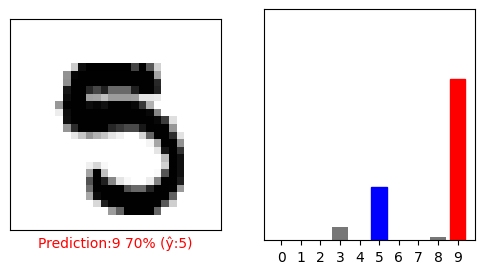

[9.6082425e-01 1.1901459e-06 4.0801215e-06 2.8662393e-03 2.8687330e-07
 1.1818908e-05 4.5172630e-05 5.6073509e-07 6.1538625e-03 3.0092394e-02] , 3


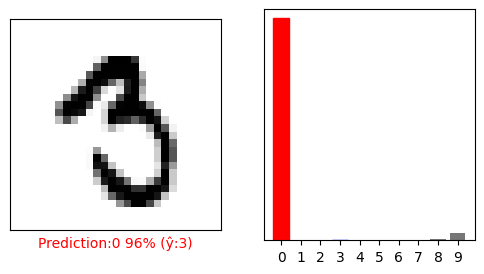

[7.5312274e-12 2.7272700e-09 6.2767364e-10 5.6590661e-03 1.0413285e-11
 9.9425477e-01 7.1466227e-13 3.8266708e-12 1.2437323e-08 8.6152722e-05] , 3


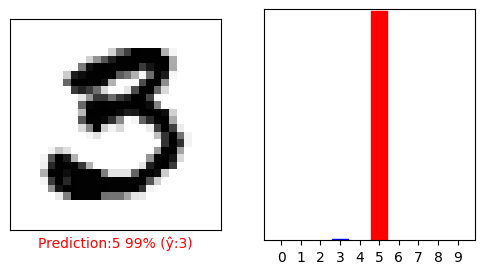

[1.9465285e-10 2.0737134e-10 3.1230976e-11 1.4838024e-08 3.4925058e-06
 2.8207624e-11 2.1064739e-14 8.5717733e-07 1.5818385e-05 9.9997973e-01] , 8


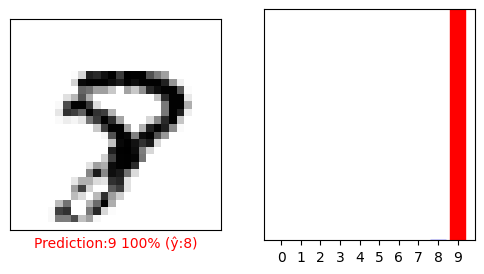

[5.5810820e-06 4.1221920e-04 4.7870486e-05 4.5447625e-04 1.6178354e-04
 1.5497202e-06 1.9445773e-07 8.6653578e-01 1.5683507e-05 1.3236479e-01] , 9


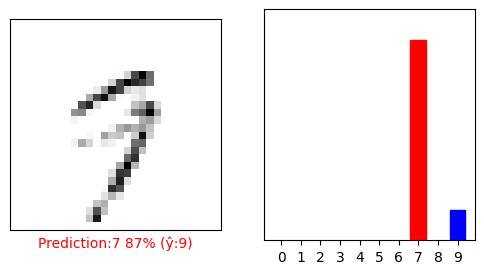

[8.9763617e-08 3.6080669e-15 6.3465405e-03 9.0358943e-13 9.8018866e-08
 9.2624674e-08 9.9365306e-01 2.1653089e-12 5.5377144e-11 1.1176613e-18] , 2


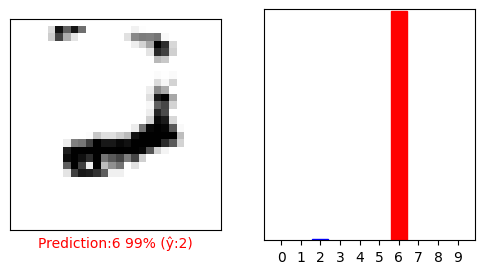

[4.0154667e-03 4.1006800e-08 6.3317657e-06 4.9679009e-05 7.6013727e-08
 3.2287062e-09 2.1174855e-09 1.5117383e-01 5.2843175e-06 8.4474939e-01] , 0


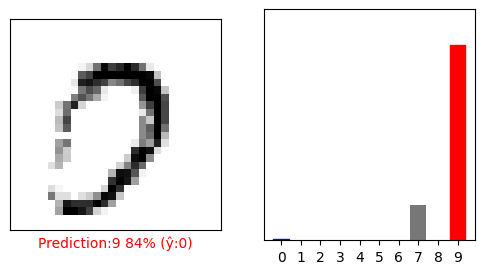

[9.0948386e-05 3.9990568e-03 2.1879330e-02 1.1111173e-02 6.9742799e-01
 6.9133299e-03 5.2992388e-04 3.4192540e-03 2.5458196e-01 4.7036225e-05] , 8


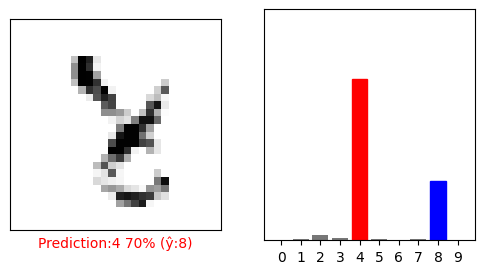

[7.5866442e-09 4.9387818e-05 9.8795736e-09 9.2632649e-03 8.3593326e-04
 1.0416798e-07 3.1995854e-11 1.5786184e-03 5.5063737e-04 9.8772210e-01] , 8


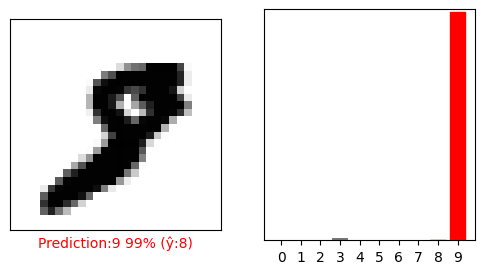

[1.0589128e-03 1.7417328e-02 5.0991428e-05 6.7826207e-08 2.6374957e-05
 1.4546020e-05 9.8032159e-01 2.1122470e-09 1.1101386e-03 6.5192221e-09] , 1


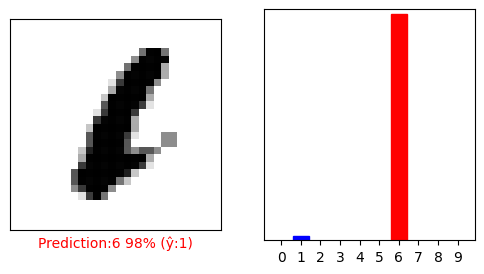

[3.3574989e-09 4.4918808e-12 2.8651204e-08 7.1866130e-18 9.4574153e-01
 1.8375096e-09 5.4258451e-02 8.7219454e-11 4.3414691e-14 1.4658637e-11] , 6


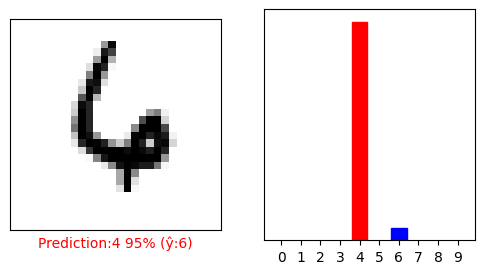

[9.4294886e-04 8.3127477e-11 9.4632513e-10 1.7264525e-06 5.3731469e-07
 8.4025605e-04 9.9794203e-01 1.0552572e-05 2.6191113e-04 1.9856317e-09] , 0


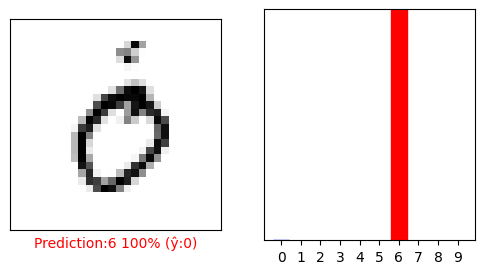

[1.1138878e-04 3.6034575e-07 2.2215910e-02 3.7943057e-06 2.2873280e-10
 7.9155623e-12 1.7405280e-11 9.7766703e-01 1.3594729e-06 1.7074726e-07] , 2


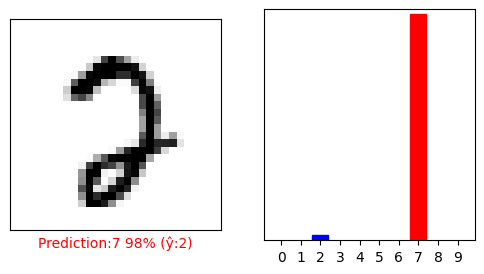

[1.1363113e-11 5.5677685e-14 3.7490186e-14 1.3333915e-08 7.4914921e-11
 6.5220788e-02 2.1514248e-09 1.5472545e-11 1.6874459e-07 9.3477893e-01] , 5


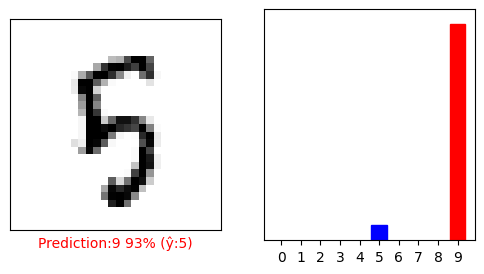

[1.7438089e-07 5.0275253e-07 1.6181156e-08 2.2455448e-07 3.6672982e-09
 1.5002514e-01 1.9043349e-03 7.1516341e-11 8.4804195e-01 2.7563598e-05] , 5


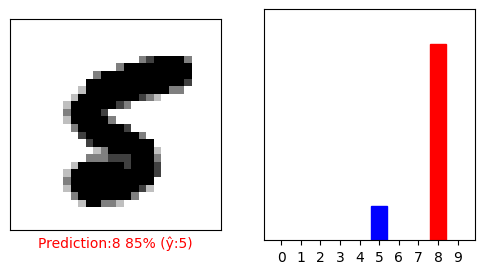

[7.77285823e-06 3.96642434e-07 7.61203945e-01 2.38673836e-01
 1.39477535e-07 9.45874889e-12 2.31060497e-07 9.24767889e-08
 1.13568836e-04 3.91605998e-14] , 3


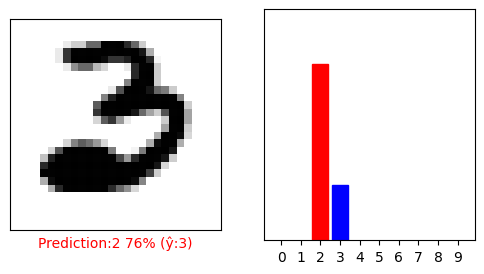

[2.30800674e-06 1.40854056e-07 5.75945139e-01 4.22774851e-01
 7.32509942e-10 1.30023926e-11 7.05266678e-10 7.37160377e-08
 1.27750670e-03 9.57679856e-12] , 3


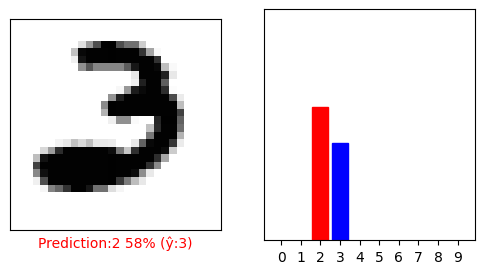

[4.3867086e-03 6.8983660e-05 7.2406036e-01 8.4219658e-04 2.3202685e-07
 8.1600701e-06 7.9337191e-03 8.7003318e-05 2.6261261e-01 1.3807582e-08] , 8


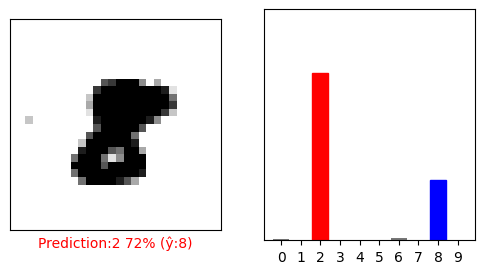

[3.9231939e-20 8.9519482e-15 1.1466352e-17 1.4237522e-02 1.0385577e-13
 1.3179476e-10 1.4850070e-23 1.9272996e-15 3.8269421e-10 9.8576248e-01] , 3


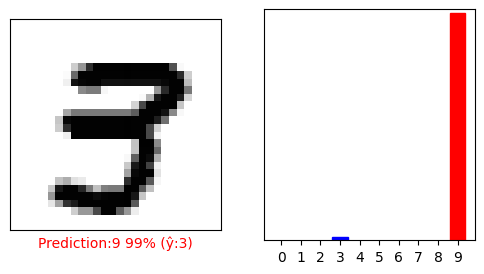

[6.9740977e-11 4.9786807e-11 5.2968369e-11 3.0099733e-05 6.3423391e-07
 1.4140732e-05 2.9243165e-14 3.7840717e-05 1.2942843e-09 9.9991727e-01] , 3


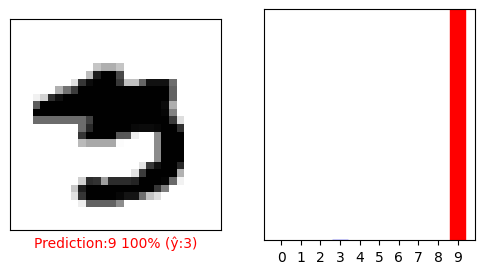

[3.0272091e-07 1.0544340e-09 2.1734032e-04 2.9547516e-06 2.4885130e-01
 3.7747708e-03 7.7348474e-08 7.4186349e-01 5.2082023e-06 5.2845315e-03] , 4


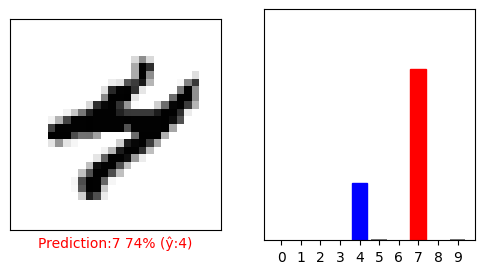

[1.8363230e-06 4.3286482e-04 9.7042785e-06 6.0948547e-02 7.2487490e-04
 9.7548207e-03 2.8042285e-07 3.5791458e-05 5.1637040e-04 9.2757487e-01] , 3


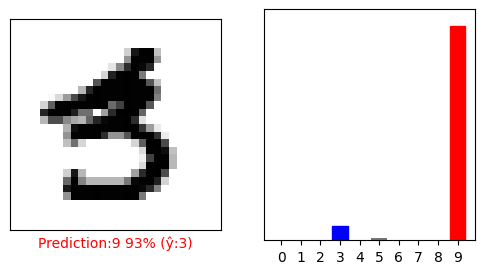

[1.0033408e-14 1.8595051e-19 2.6912375e-10 2.8414725e-25 9.9967265e-01
 5.3501613e-11 3.2733267e-04 4.0208575e-23 7.4161511e-20 2.7754201e-15] , 6


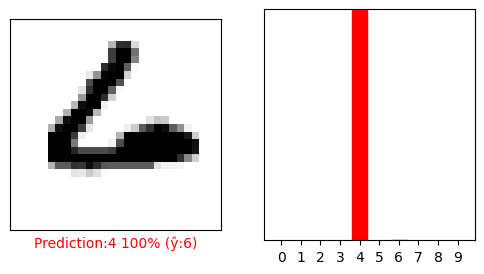

[2.5328243e-01 1.2510047e-12 1.2625696e-10 3.5713241e-10 2.4543772e-07
 9.4434398e-09 7.4671727e-01 1.7591145e-13 2.0142958e-11 1.7860817e-12] , 0


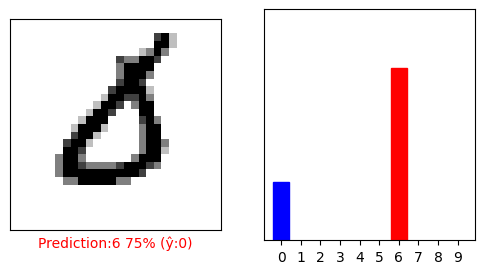

[3.3201073e-07 3.2085179e-12 3.5439815e-08 2.0853321e-11 7.5605205e-14
 9.6049708e-01 3.9143793e-02 8.2193786e-08 3.5863896e-04 7.3194467e-13] , 8


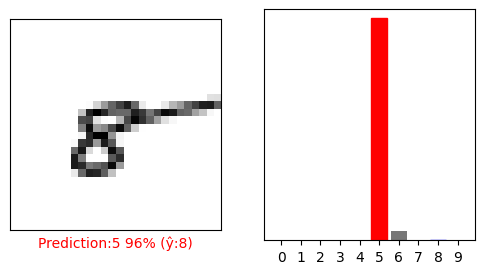

[2.07262874e-10 6.99374558e-09 4.75697148e-10 1.11639224e-01
 1.12348602e-07 3.93699935e-07 1.74180074e-13 3.28033226e-11
 1.51991867e-03 8.86840284e-01] , 3


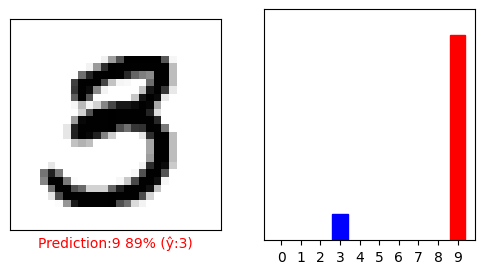

[3.1054561e-09 3.4506747e-06 1.1191660e-06 9.9591690e-01 1.0208389e-06
 3.6706580e-03 2.0286524e-07 2.2781044e-10 3.1227575e-04 9.4290073e-05] , 5


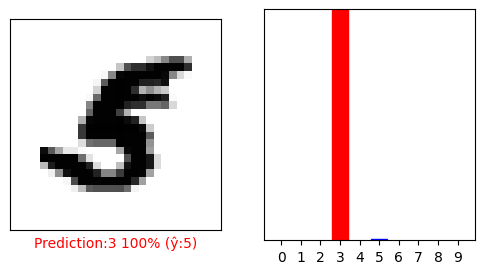

[2.2939821e-08 6.2240107e-04 4.4904336e-05 8.4230101e-01 2.8161622e-08
 2.0641774e-10 4.5756177e-12 1.5244401e-01 4.5874794e-03 1.0092175e-07] , 7


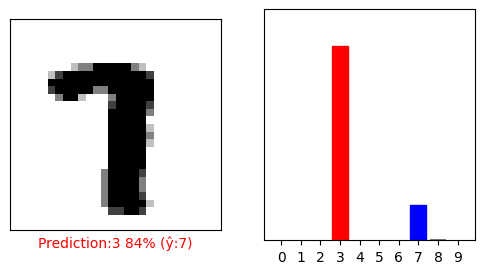

[6.68778550e-03 6.15561474e-03 3.41759175e-02 1.64897356e-04
 1.07003435e-01 1.98985472e-05 4.14641436e-05 1.24215381e-04
 1.55363511e-03 8.44073176e-01] , 4


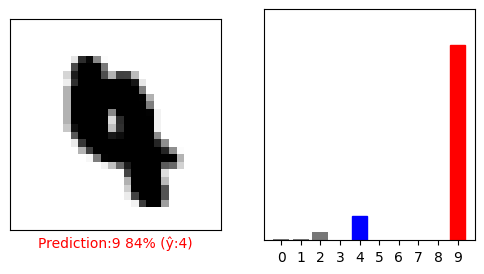

[4.8625080e-11 1.4605455e-07 9.9999785e-01 8.7014388e-07 6.4791093e-12
 1.5789969e-13 7.6295654e-13 5.6368410e-08 1.0817648e-06 1.1605147e-13] , 7


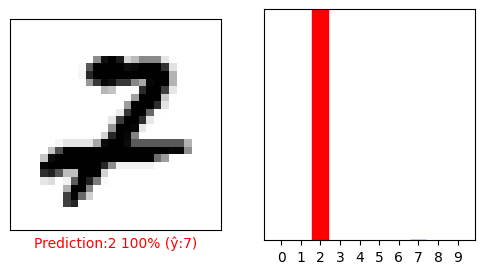

[3.6955258e-11 1.3196160e-07 9.9999952e-01 5.6965394e-10 5.7785894e-11
 3.1513594e-12 9.9005634e-13 3.7615274e-07 2.1208368e-09 2.6985841e-18] , 7


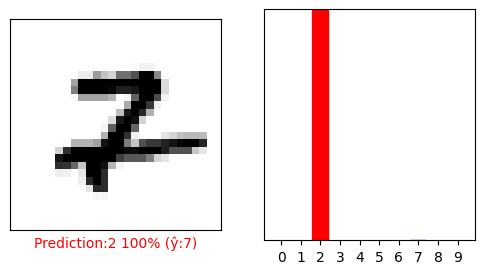

[5.4558753e-11 3.0272711e-06 9.9950564e-01 1.6184076e-08 3.1731500e-09
 2.7512242e-12 4.5445467e-13 4.9104716e-04 2.3554283e-07 7.0207136e-16] , 7


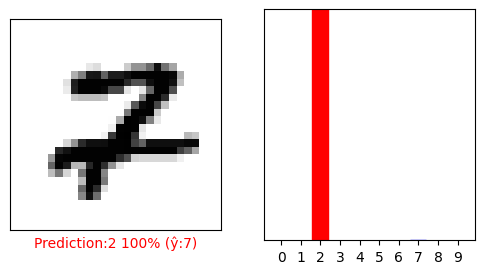

[7.6974347e-09 9.9543638e-07 9.9796307e-01 1.8738558e-03 1.0095748e-11
 1.3221210e-12 1.9599880e-13 9.8499964e-05 6.3637184e-05 1.6930640e-09] , 7


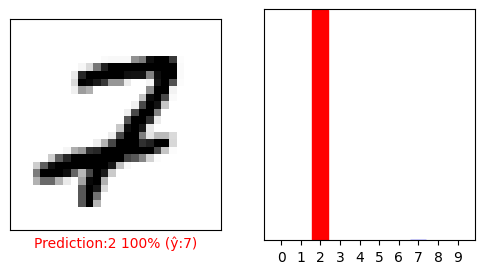

[3.6439521e-06 4.1675190e-07 2.5361156e-01 1.0813110e-01 2.1803606e-10
 4.5020723e-11 1.3234309e-08 5.5932226e-08 6.3825315e-01 2.5036333e-09] , 2


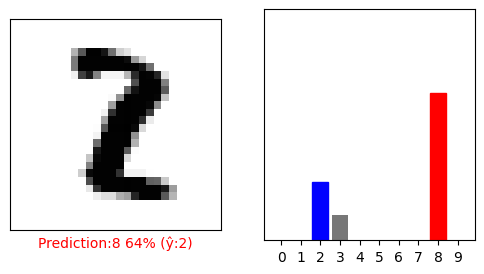

[2.5792563e-13 8.7711296e-06 7.4607076e-09 7.8728837e-01 9.4018064e-11
 2.1261723e-01 2.4204018e-12 4.8743970e-10 9.0228569e-10 8.5616040e-05] , 5


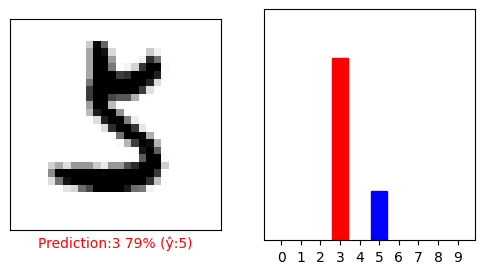

[3.6647020e-13 2.3472088e-05 4.5978732e-09 9.7610664e-01 1.3799137e-12
 2.3776531e-02 2.2760987e-13 3.0302188e-11 3.4371272e-08 9.3248549e-05] , 5


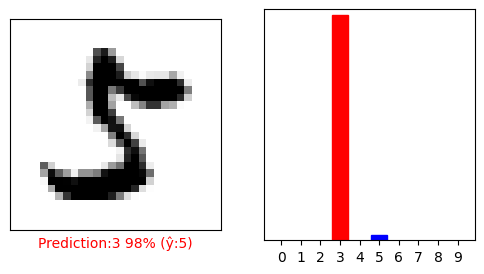

[3.2074049e-06 2.3798752e-06 7.3772156e-01 8.2497023e-02 1.7955497e-07
 2.5452238e-07 1.2485044e-10 1.7928228e-01 4.9300923e-04 6.6742381e-08] , 7


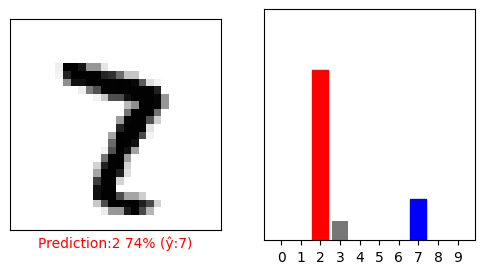

[2.5990683e-14 2.1710644e-10 8.4218275e-15 1.2090431e-14 4.9443054e-01
 1.3979979e-11 7.7130730e-16 1.2222412e-10 8.3164396e-12 5.0556946e-01] , 4


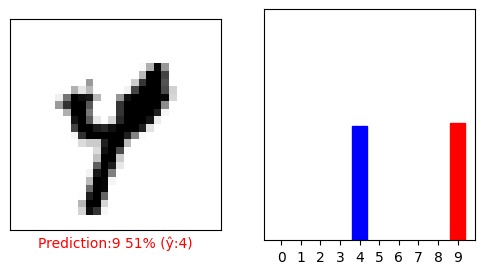

[1.0608332e-11 1.3477229e-09 3.1747094e-10 5.3559753e-14 9.9991333e-01
 2.9431262e-12 4.9745486e-12 3.7971082e-10 7.2398230e-14 8.6655520e-05] , 9


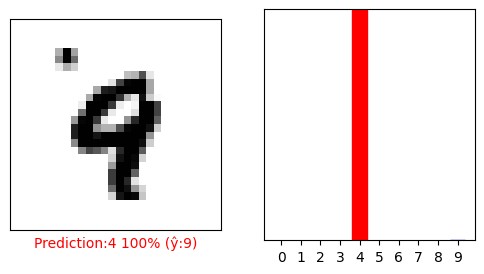

[4.6806924e-02 8.9098901e-01 1.2840712e-05 3.6149962e-05 7.2086900e-06
 1.3877474e-07 1.2972915e-03 1.7511821e-08 6.0849413e-02 1.0480069e-06] , 0


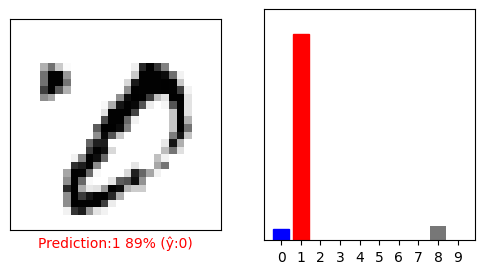

[2.0996592e-06 7.3514506e-09 5.3262960e-07 1.0553641e-06 1.7111768e-06
 1.2754534e-08 5.2447286e-11 7.4814773e-01 8.8661004e-08 2.5184667e-01] , 9


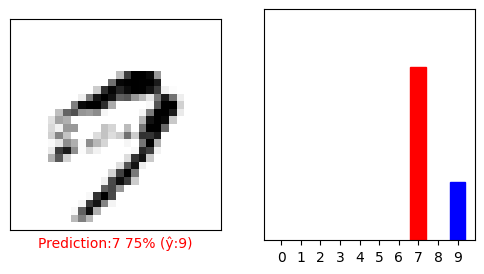

[4.8230419e-07 5.4206288e-05 7.9956323e-02 8.1313491e-02 7.5684383e-08
 2.2269161e-07 2.5071351e-10 8.3865762e-01 1.7490887e-05 1.5899455e-07] , 2


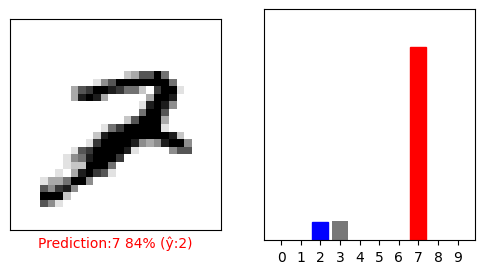

[9.0153468e-01 9.5381504e-13 3.5719289e-11 3.0906119e-06 4.0596256e-11
 9.8455086e-02 6.9258153e-06 4.6943011e-10 3.0609415e-12 3.3669352e-07] , 5


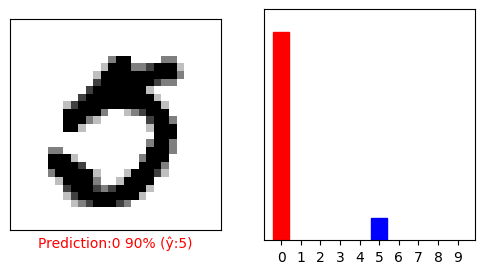

[9.2510039e-10 8.5017825e-19 1.3988811e-18 6.6791678e-17 1.0783574e-16
 3.4294199e-08 1.0000000e+00 6.4286519e-20 4.9668943e-11 7.1654172e-20] , 5


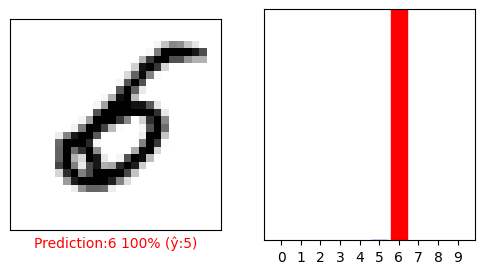

[8.4526646e-01 5.5338396e-04 1.9228723e-02 5.5154360e-06 3.5038893e-03
 2.8411738e-05 1.3132824e-01 5.8385540e-06 7.6120748e-05 3.3437850e-06] , 4


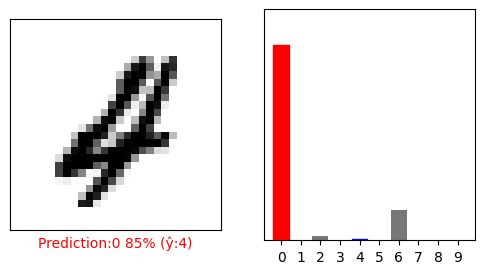

[9.3085848e-04 3.0834466e-10 2.0644118e-09 4.0626423e-06 3.3659164e-06
 8.4974188e-03 9.9055976e-01 1.6903152e-09 1.3889611e-06 3.0688141e-06] , 5


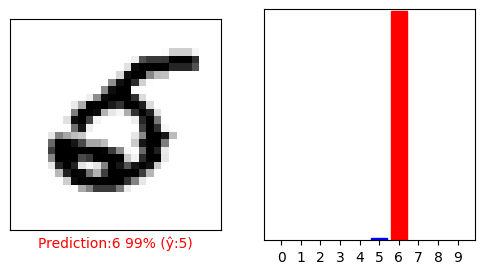

[9.80867565e-01 3.24849445e-08 5.30164698e-07 1.19531947e-07
 1.24797289e-05 9.06960759e-06 1.91096794e-02 3.64623082e-10
 3.49290730e-07 1.11972476e-07] , 5


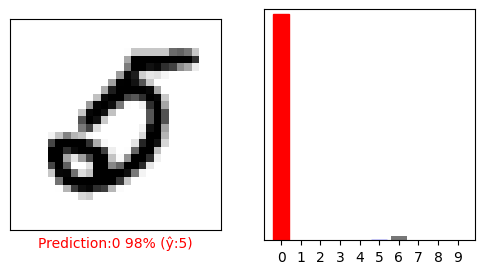

[4.9706694e-05 2.4827359e-02 2.6195858e-07 2.4356486e-06 3.4145862e-01
 1.2492720e-06 3.8380509e-07 5.2831721e-05 4.8779943e-06 6.3360232e-01] , 4


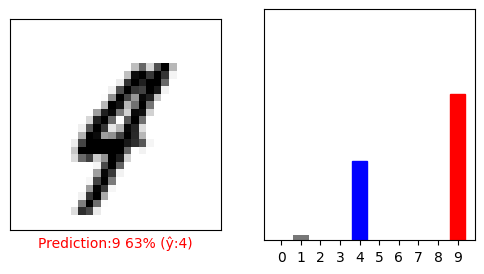

[6.14798026e-08 9.29950303e-08 6.16907414e-07 1.57931646e-09
 8.77756119e-01 1.03559792e-07 1.05452480e-09 3.38436234e-06
 4.36398973e-11 1.22239634e-01] , 9


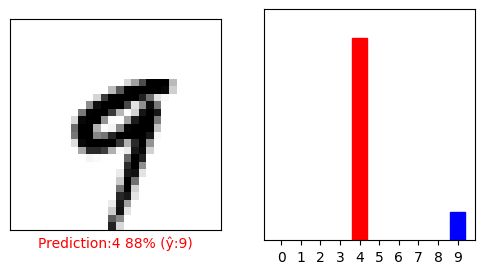

[7.7090363e-06 9.4179057e-05 1.8233150e-01 6.9623792e-01 4.1499386e-09
 2.6313591e-09 9.6296651e-09 1.0867201e-01 1.2654790e-02 1.9282461e-06] , 2


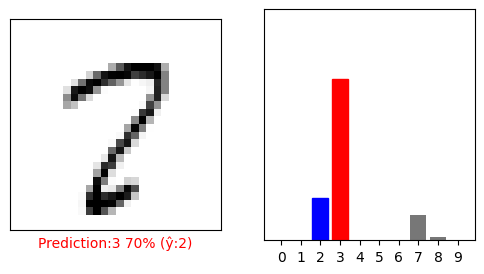

[8.7710026e-07 1.8468380e-04 4.7764089e-02 1.2046784e-04 4.0586592e-09
 1.4845893e-09 5.5904952e-09 9.5192826e-01 1.5996819e-06 7.0529631e-09] , 2


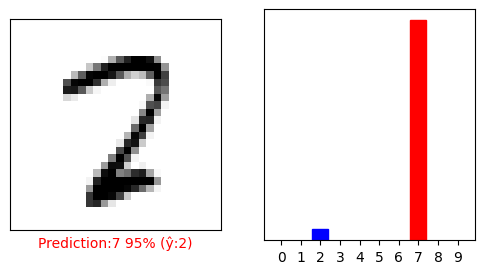

[1.7643257e-04 2.0318035e-04 5.0359317e-06 1.0097037e-03 2.7418166e-06
 6.6622244e-03 3.2064030e-01 1.3557685e-06 6.7129886e-01 8.1958945e-08] , 6


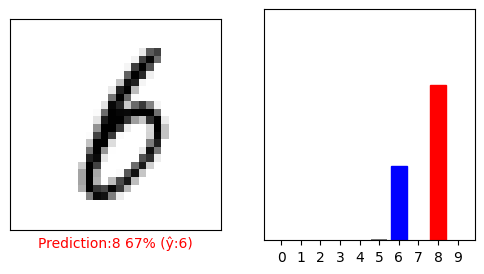

[7.4655358e-03 1.9652839e-03 1.1480017e-05 3.1022067e-09 3.2647120e-05
 2.4784045e-05 2.1438202e-01 2.4098490e-08 7.7611822e-01 1.8945188e-09] , 6


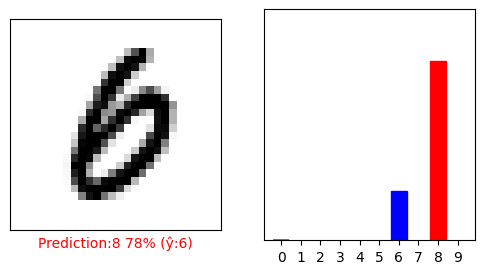

[2.1680607e-18 3.2269745e-12 7.5655340e-13 5.8034760e-01 6.7655890e-17
 4.1965231e-01 5.7005508e-15 3.0498419e-15 4.0673642e-10 2.8301363e-09] , 5


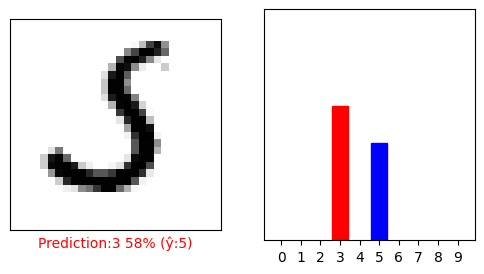

[1.6046239e-07 4.3178798e-12 1.6662131e-06 3.0095427e-05 1.6282654e-10
 2.5268355e-01 7.4675173e-01 3.0124882e-11 5.3278258e-04 7.1215074e-12] , 5


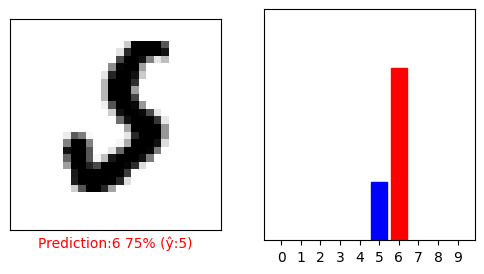

In [14]:
#Plotting false predictions for analysis.
for i in range(10000):
    if  np.argmax(predictions[i]) != y_test[i]:
        print(predictions[i], "," ,y_test[i])
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(i, predictions[i], y_test, X_test)
        plt.subplot(1,2,2)
        plot_value_array(i, predictions[i],  y_test)
        plt.show()